## Table of Contents
* [Set-up](#Setup)
    * [Load libraries](#Load_libraries)
    * [Setup for plot labels](#Setup_for_plot_labels)
    * [Setup labels](#Setup_labels)
    * [Declare conflict preferences](#Declare_conflict_preferences)
* [Create phyloseq object](#Create_phyloseq_object)
    * [Abundance filter](#Abundance_filter)
* [Alpha diversity](#Alpha_diversity_analyses)
    * [Composition plots](#Composition_plots)
    * [Richness estimates](#Richness_estimates)
    * [Statistics on richness estimates](#Statistics_on_richness_estimates)
* [Beta diversity](#Beta_diversity)
    * [Ordination matrices](#Ordination_matrices)
    * [Ordination plots](#Ordination_plots)
    * [Statistics on group distances](#Statistics)
    * [Map alpha diversity into ordination](#Color_by_alpha_diversity)

### Setup

#### Load libraries

In [3]:
library(plyr)
library(tidyverse)
library(stringr)
library(phyloseq)
library(microViz)
library(metagMisc)
library(ggplot2)
library(ggsci)
library(viridis)
library(conflicted)
library(gridExtra)
library(permute)
library(grid) 
library(knitr)
library(cowplot)
library(vegan)

Warning message in get(method, envir = home):
“internal error -3 in R_decompress1”
Warning message in get(method, envir = home):
“internal error -3 in R_decompress1”
── Attaching packages ──────────────────────────────────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.4     ✔ purrr   1.0.2
✔ tibble  3.2.1     ✔ dplyr   1.1.4
✔ tidyr   1.3.0     ✔ stringr 1.5.1
✔ readr   2.1.4     ✔ forcats 1.0.0
── Conflicts ─────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()   masks plyr::arrange()
✖ purrr::compact()   masks plyr::compact()
✖ dplyr::count()     masks plyr::count()
✖ dplyr::desc()      masks plyr::desc()
✖ dplyr::failwith()  masks plyr::failwith()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::id()        masks plyr::id()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::mutate()    masks plyr::mutate()
✖ dplyr::rename()    masks plyr::rename()
✖ dplyr::summarise() masks plyr::summarise()
✖ dplyr::

In [4]:
opts_chunk$set(cache=FALSE,warning=FALSE)

#### Setup for plot labels

In [5]:
#Setup for plot labels
#options(repr.matrix.max.cols = Inf)

In [6]:
#Setup for label sizes in plots
labels.x=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18,vjust=1,hjust=1,angle=45))

labels.x.pca=theme(axis.title.x = element_text(size=18),
               axis.text.x = element_text(size=18)) 

labels.y=theme(axis.title.y = element_text(size=18),
               axis.text.y= element_text(size=18))

labels.legend=theme(legend.text = element_text (size=18),
                    legend.title = element_text(size=18))

#### Declare conflict preferences

In [7]:
conflict_prefer("filter","dplyr")
conflict_prefer("rename","dplyr")
conflict_prefer("mutate","dplyr")
conflict_prefer("count","dplyr")

[conflicted] Will prefer dplyr::filter over any other package.
[conflicted] Will prefer dplyr::rename over any other package.
[conflicted] Will prefer dplyr::mutate over any other package.
[conflicted] Will prefer dplyr::count over any other package.


#### Source functions

In [8]:
#Import functions for plots
source("../FlagellinDiversity/plots_functions.r")

## 1. Import phyloseq object

In [9]:
psAll_count = readRDS("subsampled_median.rds")

In [10]:
#saveRDS(psAll,"psAll.rds")
#saveRDS(psAll_count,"psAll_count.rds")

## 2. Abundance filtering

In [11]:
filter_taxa_All = phyloseq_filter_prevalence(psAll_count, prev.trh = 0.05, abund.trh = 10,
  threshold_condition = "OR", abund.type = "mean")

#Retain only samples with a total count greater than zero
filter_taxa_All=prune_samples(sample_sums(filter_taxa_All)>0,filter_taxa_All)

In [12]:
filter_taxa_All

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1971 taxa and 352 samples ]
sample_data() Sample Data:       [ 352 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1971 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1971 tips and 1970 internal nodes ]

In [13]:
#Filter based on prevalence
#Prevalence threshold=0.05
#Prevalence threshold=0.01
#Prevalence threshold=0.001

filter_taxa_All_count = phyloseq_filter_prevalence(psAll_count, prev.trh = 0.05, abund.trh = 10,
  threshold_condition = "OR", abund.type = "mean")

#Retain only samples with a total count greater than zero
filter_taxa_All_count=prune_samples(sample_sums(filter_taxa_All_count)>0,filter_taxa_All_count)

In [14]:
filter_taxa_All_count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1971 taxa and 352 samples ]
sample_data() Sample Data:       [ 352 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1971 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1971 tips and 1970 internal nodes ]

In [15]:
saveRDS(filter_taxa_All_count,"filter_taxa_All_count_subsampled.median.rds")

In [16]:
count(as_tibble(filter_taxa_All_count@sam_data),category)

category      n  
1 Animal        178
2 Environmental  99
3 Plants         75

In [17]:
#write.tree(filter_taxa_All_count@phy_tree,"edgeR/filterTaxa_Allcount.tre")

In [18]:
# Flagellins in plants
flas.plants = ps_filter(filter_taxa_All_count,category=="Plants")
flas.present.plants = phyloseq_filter_prevalence(flas.plants, abund.trh = 1,
  threshold_condition = "OR", abund.type = "total")
#write.tree(flas.present.plants@phy_tree,"edgeR/flags.tre_Plants.tre")

In [19]:
# Flagellins in animals
flas.animals = ps_filter(filter_taxa_All_count,category=="Animal")
flas.present.animals = phyloseq_filter_prevalence(flas.animals, abund.trh = 1,
  threshold_condition = "OR", abund.type = "total")
#write.tree(flas.present.animals@phy_tree,"edgeR/flags.tre_Animals.tre")

In [20]:
# Flagellins in environmental
flas.env = ps_filter(filter_taxa_All_count,category=="Environmental")
flas.present.env = phyloseq_filter_prevalence(flas.env, abund.trh = 1,
  threshold_condition = "OR", abund.type = "total")
#write.tree(flas.present.env@phy_tree,"edgeR/flags.tre_Env.tre")

In [21]:
#saveRDS(filter_taxa_All,"filter_taxa_All.rds")
#saveRDS(filter_taxa_All_count,"filter_taxa_All_count.rds")

## 2. Alpha diversity analyses

### Composition plots

In [22]:
filter_taxa_All_count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1971 taxa and 352 samples ]
sample_data() Sample Data:       [ 352 samples by 10 sample variables ]
tax_table()   Taxonomy Table:    [ 1971 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1971 tips and 1970 internal nodes ]

In [23]:
top.100=phyloseq_filter_top_taxa(filter_taxa_All_count,n=100)
top.30=phyloseq_filter_top_taxa(filter_taxa_All_count,n=30)

In [24]:
top.100.barplot=plot_bar(transform_sample_counts(top.100, function(x) (1E6 * x / sum(x))),
fill="Phylum")+
                         geom_bar(position="stack",stat="identity")+
                         facet_wrap(~biome_1,scales="free")+
                         theme_minimal()+
                         labels.legend+
                         theme(axis.text.x = element_blank())+
                         scale_fill_npg()+
                         ggtitle("Top 100 taxa")

top.30.barplot=plot_bar(transform_sample_counts(top.30, function(x) (1E6 * x / sum(x))),
fill="Phylum")+
                         geom_bar(position="stack",stat="identity")+
                         facet_wrap(~biome_1,scales="free")+
                         theme_minimal()+
                         labels.legend+
                         theme(axis.text.x = element_blank())+
                         scale_fill_npg()+
                         ggtitle("Top 30 taxa")

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


Warning message:
“Removed 300 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 300 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 150 rows containing missing values (`position_stack()`).”
Warning message:
“Removed 150 rows containing missing values (`position_stack()`).”


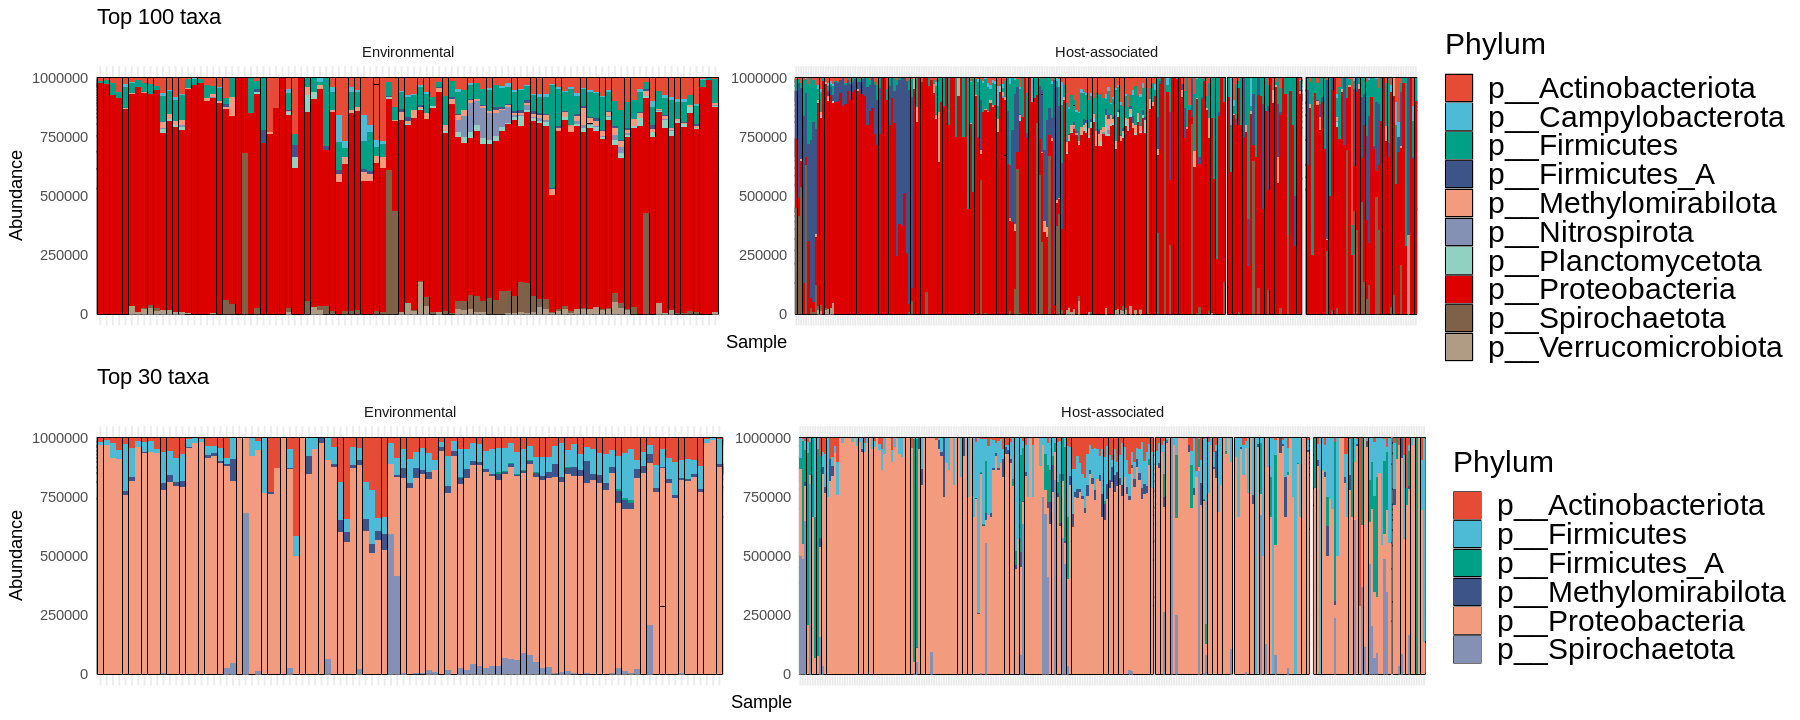

In [25]:
options(repr.plot.width=15,repr.plot.height=6)
grid.arrange(top.100.barplot,
             top.30.barplot,
             nrow=2)

### Richness estimates

In [26]:
richness.estimates=mutate(as_tibble(filter_taxa_All_count@sam_data),estimate_richness(filter_taxa_All_count, split = TRUE, measures = c("Observed", "Chao1","Shannon", "Simpson")))

In [27]:
head(richness.estimates)

Sample     Dataset      biome_0 biome_1         biome_2       
1 ERS1353920 MGYS00001254 root    Host-associated Mammalia      
2 ERS1353922 MGYS00001254 root    Host-associated Mammalia      
3 ERS1579925 MGYS00001583 root    Host-associated Actinopterygii
4 ERS1579927 MGYS00001583 root    Host-associated Actinopterygii
5 ERS1579929 MGYS00001583 root    Host-associated Actinopterygii
6 ERS1579930 MGYS00001583 root    Host-associated Actinopterygii
  biome_3          biome_4         family     category mammals  Observed
1 Digestive system Large intestine Cricetidae Animal   Mammalia 380     
2 Digestive system Large intestine Cricetidae Animal   Mammalia 378     
3 Digestive system Foregut         Salmonidae Animal   Others     5     
4 Digestive system Foregut         Salmonidae Animal   Others    13     
5 Digestive system Foregut         Salmonidae Animal   Others    10     
6 Digestive system Foregut         Salmonidae Animal   Others    30     
  Chao1     se.chao1  Shannon   Simpson  
1 551.19565 41.620868 4.0354730 0.9418021
2 566.88679 43.144845 4.5500979 0.9586902
3   6.50000  2.530582 0.7892774 0.3611111
4  22.33333  8.820821 2.1348490 0.8200000
5  11.50000  2.560146 2.0888070 0.8554688
6  47.00000 10.649939 1.5786297 0.5014982

### Statistics on richness estimates

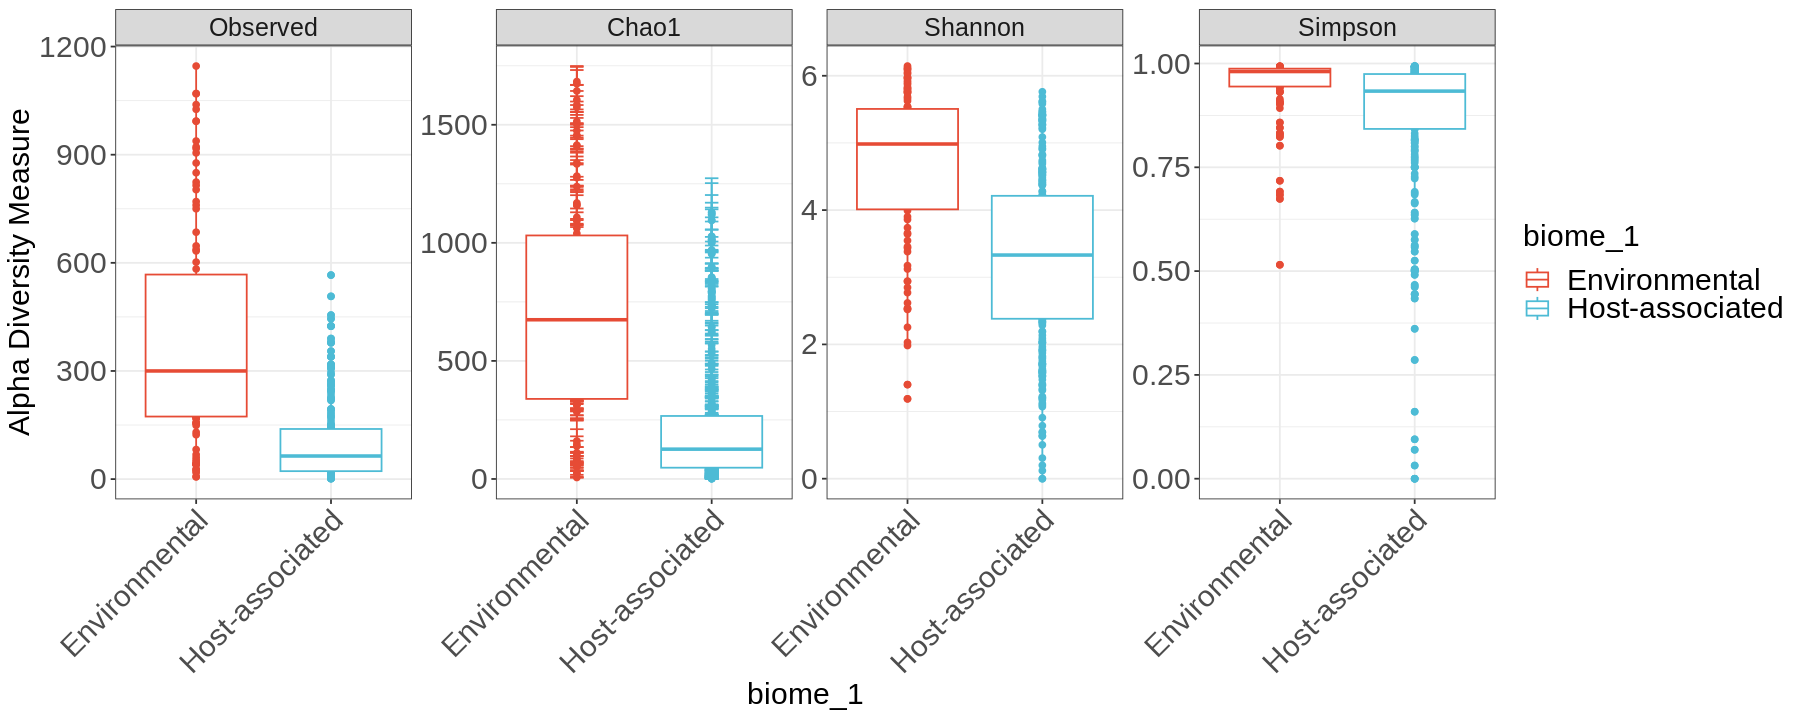

In [28]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(filter_taxa_All_count,x="biome_1",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_1")+
theme_bw()+
geom_boxplot()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

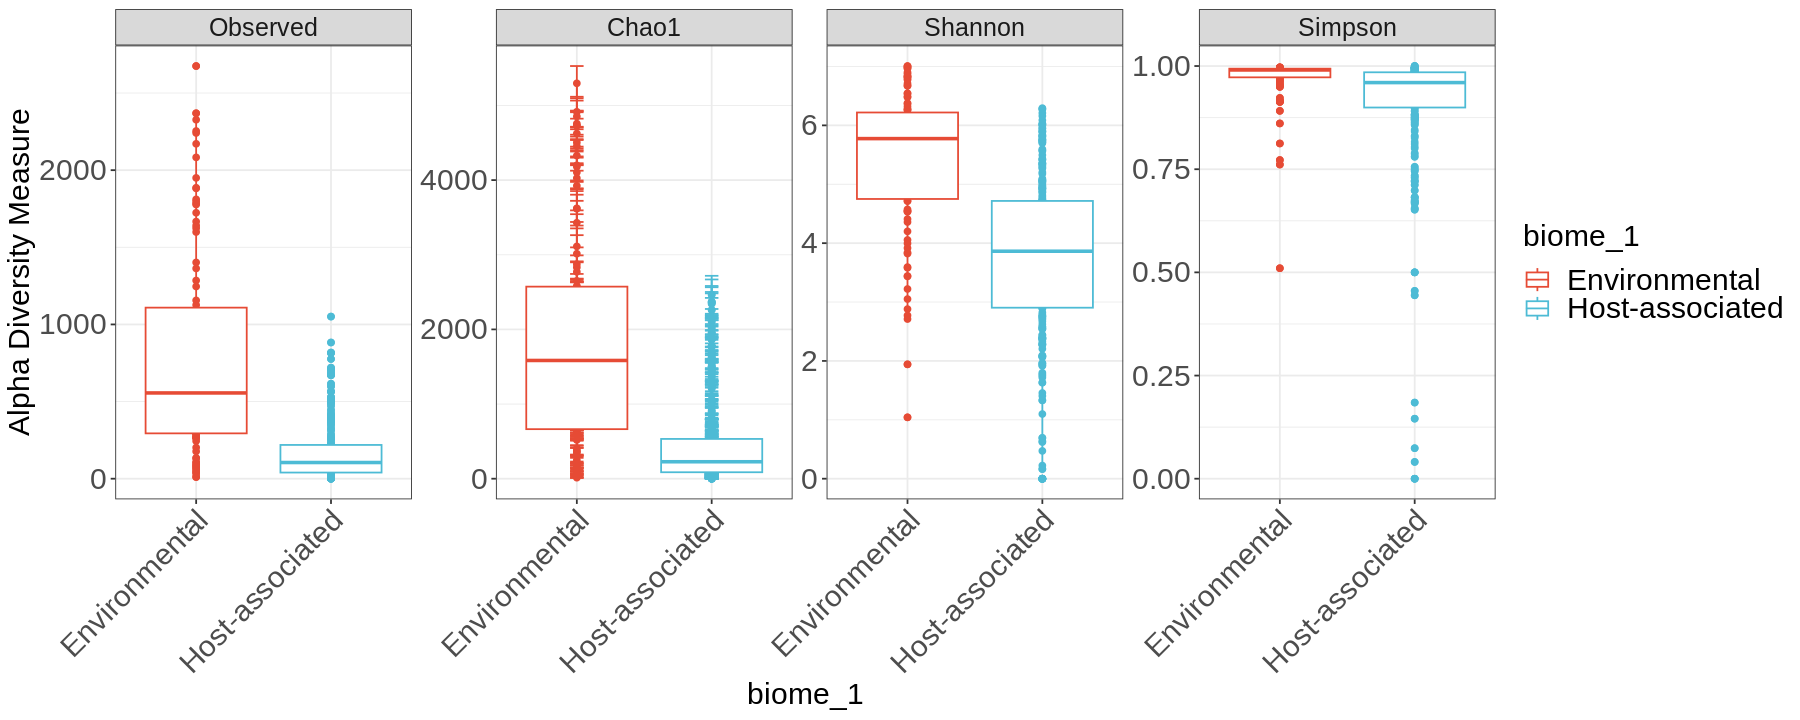

In [29]:
#Without performing abundance filter
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(psAll_count,x="biome_1",measures=c("Observed","Chao1","Shannon","Simpson"),color="biome_1")+
theme_bw()+
geom_boxplot()+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

#### I. Kruskal tests by biome_1

In [30]:
dplyr::count(as_tibble(filter_taxa_All_count@sam_data),biome_1)

biome_1         n  
1 Environmental    99
2 Host-associated 253

In [31]:
kruskal.test(Observed~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Observed by biome_1
Kruskal-Wallis chi-squared = 92.392, df = 1, p-value < 2.2e-16


In [32]:
kruskal.test(Chao1~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Chao1 by biome_1
Kruskal-Wallis chi-squared = 88.477, df = 1, p-value < 2.2e-16


In [33]:
kruskal.test(Shannon~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Shannon by biome_1
Kruskal-Wallis chi-squared = 66.799, df = 1, p-value = 3.007e-16


In [34]:
kruskal.test(Simpson~biome_1,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Simpson by biome_1
Kruskal-Wallis chi-squared = 32.914, df = 1, p-value = 9.635e-09


#### II. Kruskal tests by category

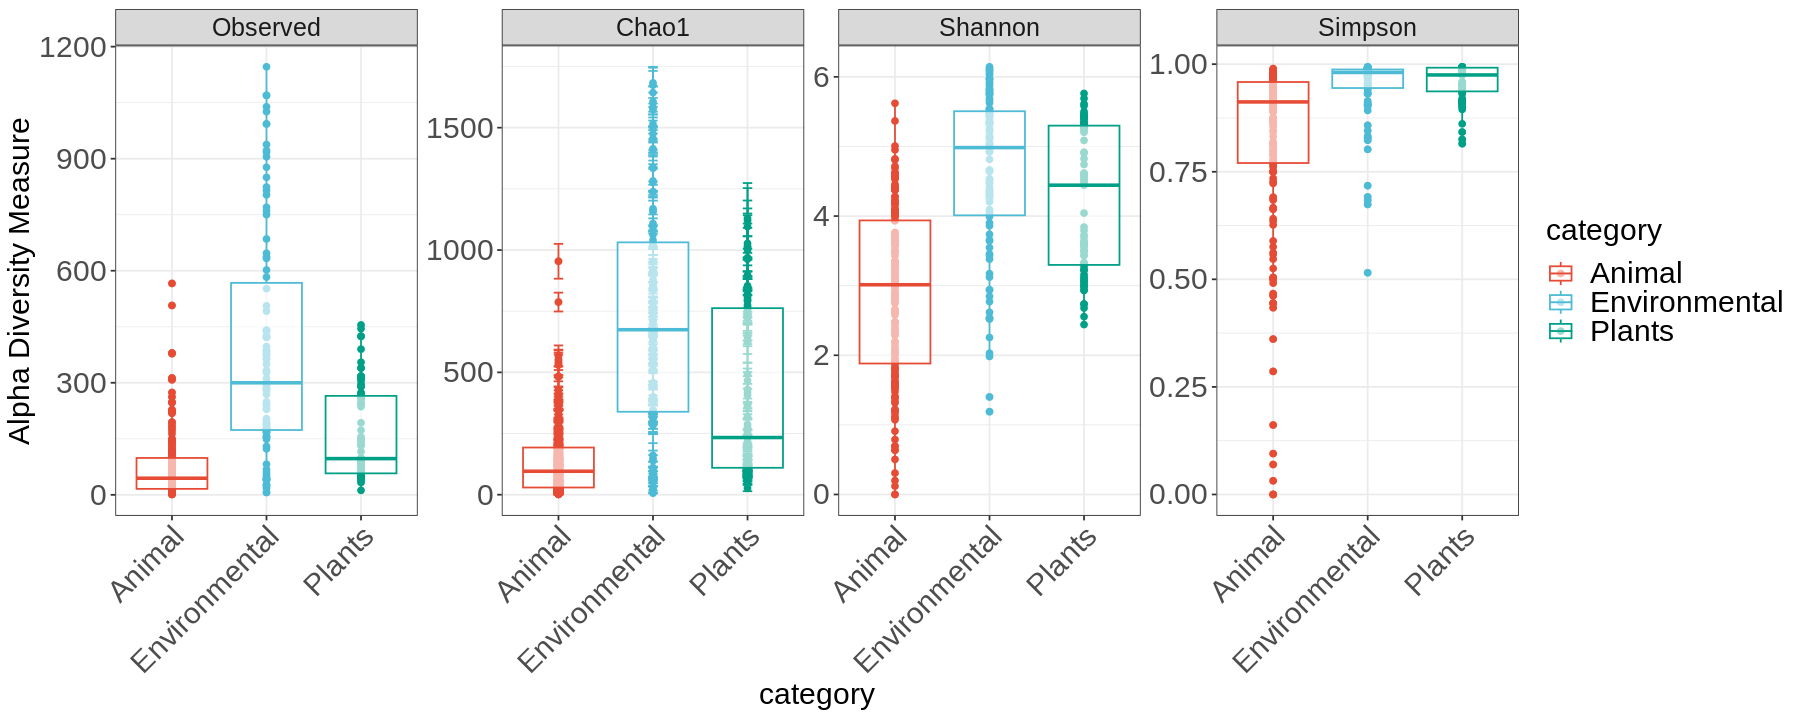

In [35]:
options(repr.plot.width=15,repr.plot.height=6)
plot_richness(filter_taxa_All_count,x="category",measures=c("Observed","Chao1","Shannon","Simpson"),color="category")+
theme_bw()+
geom_boxplot(alpha=0.6)+
scale_color_npg()+
labels.x+labels.y+labels.legend+
theme(strip.text=element_text(size=15))

In [36]:
dplyr::count(as_tibble(filter_taxa_All_count@sam_data),biome_2)

biome_2        n 
1 Actinopterygii 51
2 Amphibia       11
3 Aquatic        69
4 Aves           51
5 Mammalia       51
6 Plants         75
7 Reptilia       14
8 Terrestrial    30

In [37]:
kruskal.test(Observed~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Observed by category
Kruskal-Wallis chi-squared = 121.06, df = 2, p-value < 2.2e-16


In [38]:
kruskal.test(Chao1~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Chao1 by category
Kruskal-Wallis chi-squared = 124.96, df = 2, p-value < 2.2e-16


In [39]:
kruskal.test(Shannon~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Shannon by category
Kruskal-Wallis chi-squared = 110.87, df = 2, p-value < 2.2e-16


In [40]:
kruskal.test(Simpson~category,data=richness.estimates)


	Kruskal-Wallis rank sum test

data:  Simpson by category
Kruskal-Wallis chi-squared = 89.499, df = 2, p-value < 2.2e-16


#### III. Wilcoxon tests by category

In [41]:
pairwise.wilcox.test(richness.estimates$Observed, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Observed and richness.estimates$category 

              Animal  Environmental
Environmental < 2e-16 -            
Plants        2.5e-09 2.7e-07      

P value adjustment method: fdr 

In [42]:
pairwise.wilcox.test(richness.estimates$Chao1, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Chao1 and richness.estimates$category 

              Animal  Environmental
Environmental < 2e-16 -            
Plants        2.9e-10 6.5e-05      

P value adjustment method: fdr 

In [43]:
pairwise.wilcox.test(richness.estimates$Shannon, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Shannon and richness.estimates$category 

              Animal Environmental
Environmental <2e-16 -            
Plants        3e-12  0.0055       

P value adjustment method: fdr 

In [44]:
pairwise.wilcox.test(richness.estimates$Simpson, richness.estimates$category, p.adjust.method="fdr")


	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  richness.estimates$Simpson and richness.estimates$category 

              Animal  Environmental
Environmental 1.7e-15 -            
Plants        6.6e-13 0.45         

P value adjustment method: fdr 

## 3. Beta diversity

Add alpha diversity measures to samples data. Then include it to the phyloseq object

In [45]:
#tmp mapping table with richness estimates
mapping_ps_All_richness=sample_data(richness.estimates)
rownames(mapping_ps_All_richness)=richness.estimates$Sample

filter_taxa_All_count=phyloseq(filter_taxa_All_count@otu_table,mapping_ps_All_richness,filter_taxa_All@tax_table,filter_taxa_All@phy_tree)
filter_taxa_All_count

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 1971 taxa and 352 samples ]
sample_data() Sample Data:       [ 352 samples by 15 sample variables ]
tax_table()   Taxonomy Table:    [ 1971 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 1971 tips and 1970 internal nodes ]

In [46]:
head(filter_taxa_All_count@sam_data)

Sample     Dataset      biome_0 biome_1         biome_2       
ERS1353920 ERS1353920 MGYS00001254 root    Host-associated Mammalia      
ERS1353922 ERS1353922 MGYS00001254 root    Host-associated Mammalia      
ERS1579925 ERS1579925 MGYS00001583 root    Host-associated Actinopterygii
ERS1579927 ERS1579927 MGYS00001583 root    Host-associated Actinopterygii
ERS1579929 ERS1579929 MGYS00001583 root    Host-associated Actinopterygii
ERS1579930 ERS1579930 MGYS00001583 root    Host-associated Actinopterygii
           biome_3          biome_4         family     category mammals 
ERS1353920 Digestive system Large intestine Cricetidae Animal   Mammalia
ERS1353922 Digestive system Large intestine Cricetidae Animal   Mammalia
ERS1579925 Digestive system Foregut         Salmonidae Animal   Others  
ERS1579927 Digestive system Foregut         Salmonidae Animal   Others  
ERS1579929 Digestive system Foregut         Salmonidae Animal   Others  
ERS1579930 Digestive system Foregut         Salmonidae Animal   Others  
           Observed Chao1     se.chao1  Shannon   Simpson  
ERS1353920 380      551.19565 41.620868 4.0354730 0.9418021
ERS1353922 378      566.88679 43.144845 4.5500979 0.9586902
ERS1579925   5        6.50000  2.530582 0.7892774 0.3611111
ERS1579927  13       22.33333  8.820821 2.1348490 0.8200000
ERS1579929  10       11.50000  2.560146 2.0888070 0.8554688
ERS1579930  30       47.00000 10.649939 1.5786297 0.5014982

### Ordination matrices

In [48]:
#Distance matrices for anosim
jaccard.dist = distance(filter_taxa_All_count,method="jaccard",type="samples")
unifrac.dist = distance(filter_taxa_All_count,method="unifrac",type="samples")
bray.dist = distance(filter_taxa_All_count,method="bray",type="samples")
wunifrac.dist = distance(filter_taxa_All_count,method="wunifrac",type="samples")

In [49]:
#Distance matrices for plots
unifrac.dist.filt = ordinate(filter_taxa_All_count,distance="unifrac",method="PCoA")
wunifrac.dist.filt = ordinate(filter_taxa_All_count,distance="wunifrac",method="PCoA")
jaccard.dist.filt = ordinate(filter_taxa_All_count,distance="jaccard",method="PCoA")
bray.dist.filt = ordinate(filter_taxa_All_count,distance="bray",method="PCoA")

### Ordination plots

#### By biome 1

In [50]:
jaccard.plot = plot_color_discrete(filter_taxa_All_count,jaccard.dist.filt,"biome_1")
bray.plot = plot_color_discrete(filter_taxa_All_count,bray.dist.filt,"biome_1")
unifrac.plot = plot_color_discrete(filter_taxa_All_count,unifrac.dist.filt,"biome_1")
wunifrac.plot = plot_color_discrete(filter_taxa_All_count,wunifrac.dist.filt,"biome_1")


Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


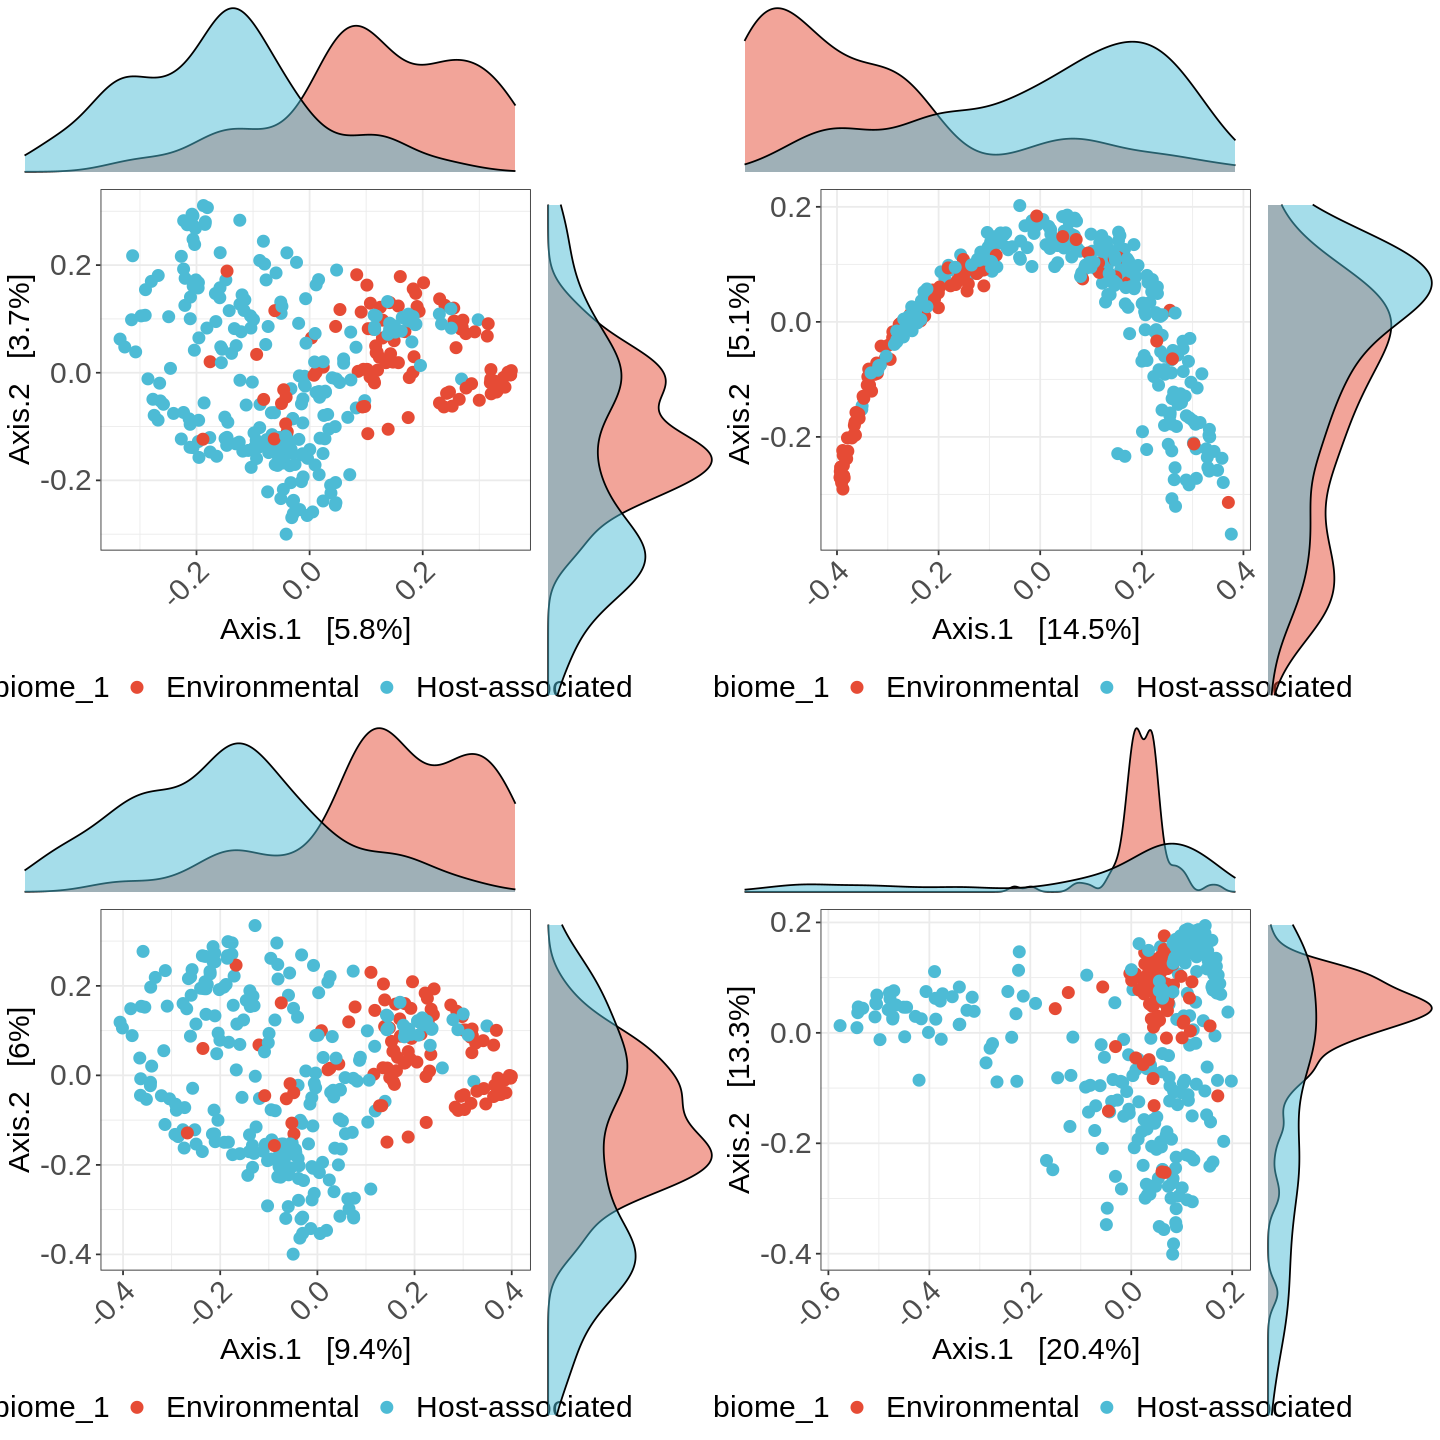

In [51]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.dist.filt,jaccard.plot,"biome_1",richness.estimates),
            plot_grid_pcoa(unifrac.dist.filt,unifrac.plot,"biome_1",richness.estimates),
            plot_grid_pcoa(bray.dist.filt,bray.plot,"biome_1",richness.estimates),
            plot_grid_pcoa(wunifrac.dist.filt,wunifrac.plot,"biome_1",richness.estimates),
            nrow=2)


##### ANOSIM

In [52]:
biome_1.var = get_variable(filter_taxa_All_count,"biome_1")

In [53]:
biome1.anosim.jacc = anosim(jaccard.dist,biome_1.var)
biome1.anosim.unifrac = anosim(unifrac.dist,biome_1.var)
biome1.anosim.bray = anosim(bray.dist,biome_1.var)
biome1.anosim.wunifrac = anosim(wunifrac.dist,biome_1.var)

In [54]:
anosim.results = data.frame(
    col = c("significance","R_statistic"),
    "jaccard" = c(biome1.anosim.jacc$signif,biome1.anosim.jacc$statistic),
    "bray" = c(biome1.anosim.bray$signif,biome1.anosim.bray$statistic),
    "unifrac" = c(biome1.anosim.unifrac$signif,biome1.anosim.unifrac$statistic),
    "wunifrac" = c(biome1.anosim.wunifrac$signif,biome1.anosim.wunifrac$statistic))

In [55]:
anosim.results

col          jaccard    bray       unifrac   wunifrac  
1 significance 0.43400000 0.44700000 0.0010000  1.0000000
2 R_statistic  0.00265972 0.00265972 0.1124822 -0.1363607

##### PERMANOVA

In [56]:
methods_to_test <- c("jaccard", "bray", "unifrac", "wunifrac")
biome_var <- "biome_1" 
all_permanova_results <- run_permanova(filter_taxa_All_count, methods_to_test, biome_var)


In [57]:
all_permanova_results

$jaccard
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = formula, data = as(sample_data(physeq_object), "data.frame"), permutations = 999)
          Df SumOfSqs      R2      F Pr(>F)    
biome_1    1    4.705 0.02934 10.578  0.001 ***
Residual 350  155.673 0.97066                  
Total    351  160.378 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$bray
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = formula, data = as(sample_data(physeq_object), "data.frame"), permutations = 999)
          Df SumOfSqs      R2      F Pr(>F)    
biome_1    1    6.735 0.04516 16.555  0.001 ***
Residual 350  142.387 0.95484                  
Total    351  149.122 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$unifrac
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = formula, data = as(sample_data(physeq_object), "data.frame"), permutations = 999)
          Df SumOfSqs      R2      F Pr(>F)    
biome_1    1    6.745 0.05433 20.108  0.001 ***
Residual 350  117.407 0.94567                  
Total    351  124.153 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$wunifrac
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = formula, data = as(sample_data(physeq_object), "data.frame"), permutations = 999)
          Df SumOfSqs      R2      F Pr(>F)    
biome_1    1    2.638 0.04997 18.409  0.001 ***
Residual 350   50.162 0.95003                  
Total    351   52.801 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

##### Wilcoxon on PCoA axis

In [58]:
#List ordination vectors
ord.vectors = list(jaccard.vector = getOrdinationVectors(jaccard.dist.filt,richness.estimates),
    bray.vector = getOrdinationVectors(bray.dist.filt,richness.estimates),
    unifrac.vector = getOrdinationVectors(unifrac.dist.filt,richness.estimates), 
    wunifrac.vector = getOrdinationVectors(wunifrac.dist.filt,richness.estimates))

Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


In [59]:
ord.wilcoxon.list.biome1 = lapply(ord.vectors,wilcoxonOrdinationAxis,"biome_1")

In [60]:
wilcoxon.axis.stats.biome1 <- rbind(
  ord.wilcoxon.list.biome1[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list.biome1[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list.biome1[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list.biome1[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [61]:
wilcoxon.axis.stats.biome1

Environmental Environmental.1 Environmental.2 Environmental.3
Host-associated  1.563445e-28  2.052102e-03    1.885969e-04    0.9452006      
Host-associated1 2.054119e-28  9.734174e-03    2.870424e-05    0.1579563      
Host-associated2 3.849124e-25  2.759490e-06    1.719917e-02    0.3130280      
Host-associated3 4.502975e-01  7.156451e-07    4.857726e-31    0.2545494      
                 OrdMethod
Host-associated  Jaccard  
Host-associated1 Bray     
Host-associated2 Unifrac  
Host-associated3 wUnifrac

#### By category

In [62]:
jaccard.plot.cat = plot_color_discrete(filter_taxa_All_count,jaccard.dist.filt,"category")
bray.plot.cat = plot_color_discrete(filter_taxa_All_count,bray.dist.filt,"category")
unifrac.plot.cat = plot_color_discrete(filter_taxa_All_count,unifrac.dist.filt,"category")
wunifrac.plot.cat = plot_color_discrete(filter_taxa_All_count,wunifrac.dist.filt,"category")


Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


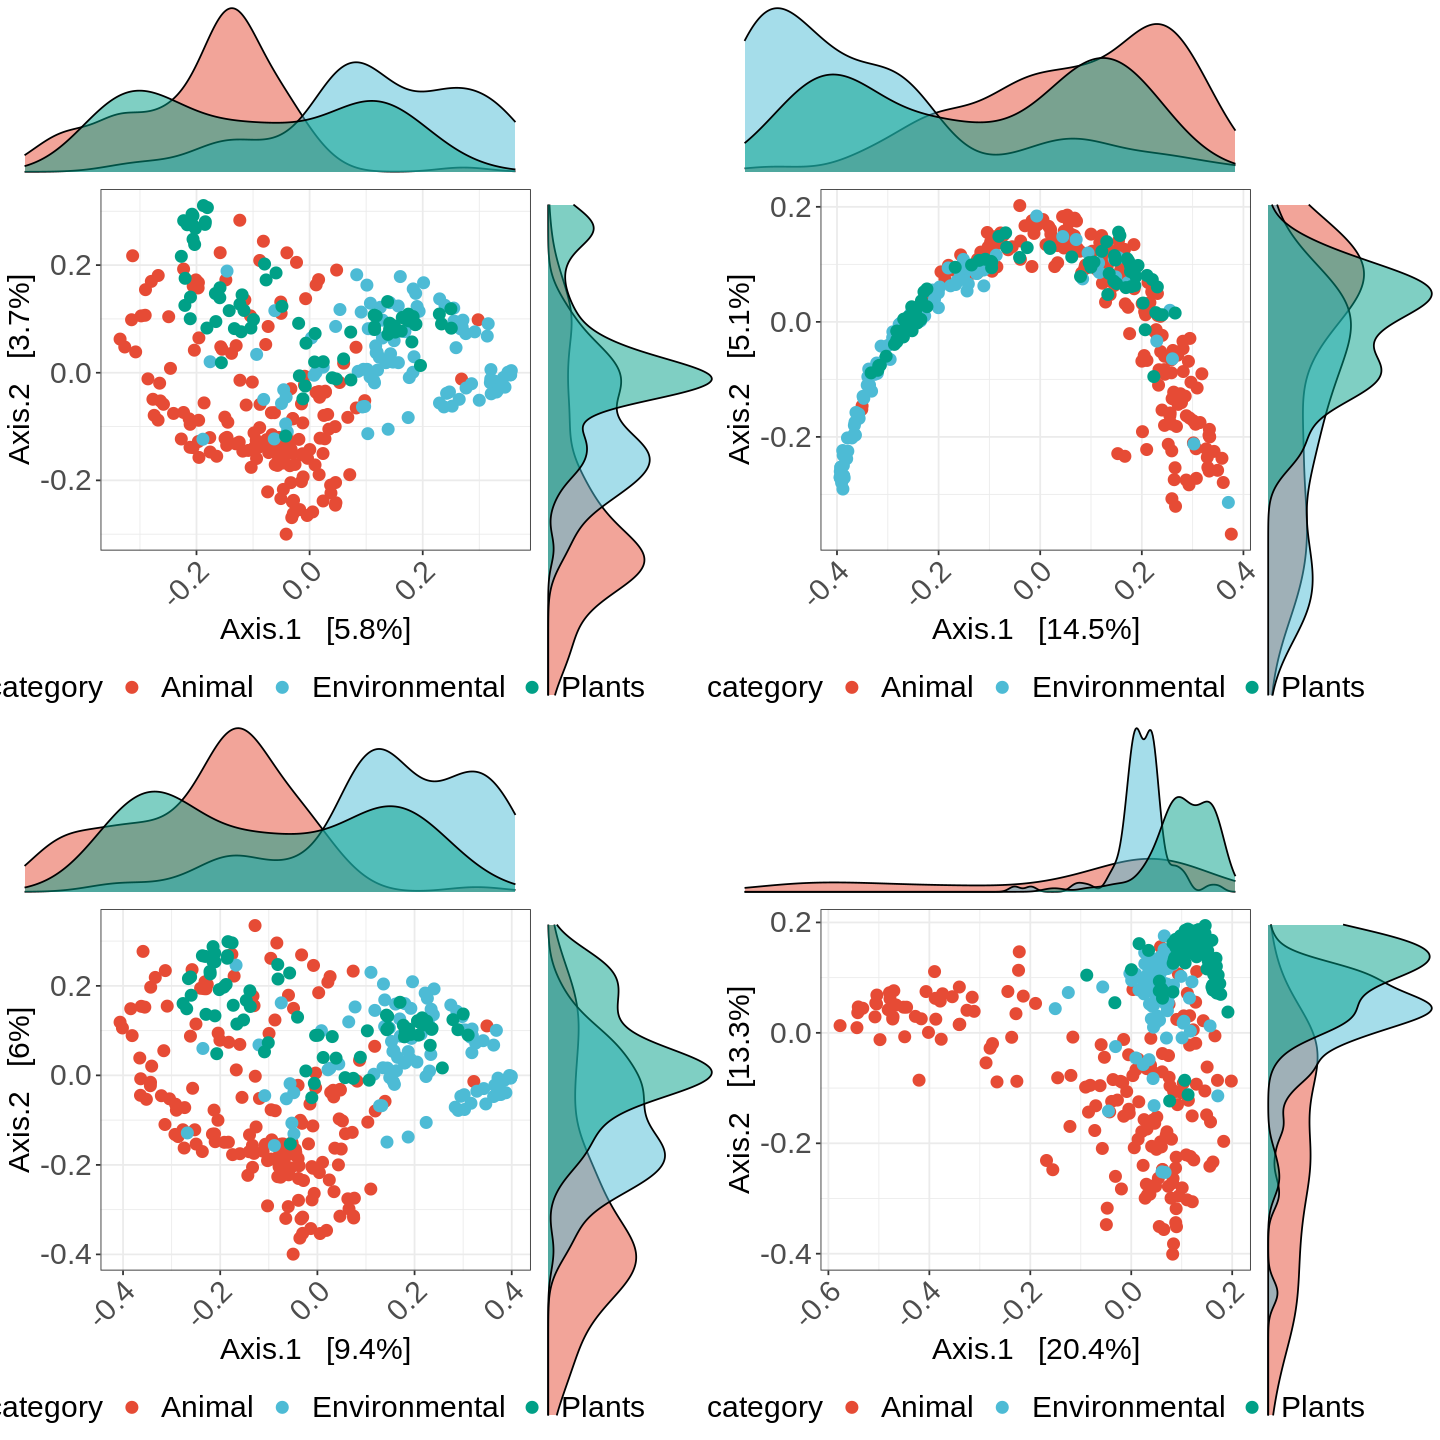

In [63]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.dist.filt,jaccard.plot.cat,"category",richness.estimates),
            plot_grid_pcoa(unifrac.dist.filt,unifrac.plot.cat,"category",richness.estimates),
            plot_grid_pcoa(bray.dist.filt,bray.plot.cat,"category",richness.estimates),
            plot_grid_pcoa(wunifrac.dist.filt,wunifrac.plot.cat,"category",richness.estimates),
            nrow=2)


In [64]:
#Generate individual PCoA
#jaccard.pcoa.plot = plot_color_by(filter_taxa_All_count,jaccard.dist.filt,"category")

##### ANOSIM

In [65]:
category.var = get_variable(filter_taxa_All_count,"category")

In [66]:
cat.anosim.jacc = anosim(jaccard.dist,category.var)
cat.anosim.unifrac = anosim(unifrac.dist,category.var)
cat.anosim.bray = anosim(bray.dist,category.var)
cat.anosim.wunifrac = anosim(wunifrac.dist,category.var)

In [67]:
c("jaccard",cat.anosim.jacc$signif,cat.anosim.jacc$statistic)

[1] "jaccard"            "0.001"              "0.0845246583315971"

In [68]:
anosim.results_cat = data.frame(
    "distance_method" = c("jaccard","bray","unifrac","wunifrac"),
    "R_statistic" = c(cat.anosim.jacc$statistic,cat.anosim.bray$statistic,cat.anosim.unifrac$statistic,cat.anosim.wunifrac$statistic),
    "significance" = c(cat.anosim.jacc$signif,cat.anosim.bray$signif,cat.anosim.unifrac$signif,cat.anosim.wunifrac$statistic)
    )

In [69]:
anosim.results_cat

distance_method R_statistic significance
1 jaccard         0.08452466  0.00100000  
2 bray            0.08452466  0.00100000  
3 unifrac         0.20881612  0.00100000  
4 wunifrac        0.06794385  0.06794385

##### PERMANOVA

In [70]:
methods_to_test <- c("jaccard", "bray", "unifrac", "wunifrac")
biome_var <- "category" 
all_permanova_category <- run_permanova(filter_taxa_All_count, methods_to_test, "category")


In [71]:
all_permanova_category

$jaccard
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = formula, data = as(sample_data(physeq_object), "data.frame"), permutations = 999)
          Df SumOfSqs      R2      F Pr(>F)    
category   2    8.493 0.05296 9.7581  0.001 ***
Residual 349  151.884 0.94704                  
Total    351  160.378 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$bray
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = formula, data = as(sample_data(physeq_object), "data.frame"), permutations = 999)
          Df SumOfSqs      R2      F Pr(>F)    
category   2   12.045 0.08078 15.334  0.001 ***
Residual 349  137.076 0.91922                  
Total    351  149.122 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$unifrac
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = formula, data = as(sample_data(physeq_object), "data.frame"), permutations = 999)
          Df SumOfSqs      R2      F Pr(>F)    
category   2    10.78 0.08683 16.593  0.001 ***
Residual 349   113.37 0.91317                  
Total    351   124.15 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

$wunifrac
Permutation test for adonis under reduced model
Terms added sequentially (first to last)
Permutation: free
Number of permutations: 999

adonis2(formula = formula, data = as(sample_data(physeq_object), "data.frame"), permutations = 999)
          Df SumOfSqs      R2      F Pr(>F)    
category   2    7.475 0.14157 28.777  0.001 ***
Residual 349   45.326 0.85843                  
Total    351   52.801 1.00000                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

##### Wilcoxon on PCoA axis

In [72]:
ord.wilcoxon.list = lapply(ord.vectors,wilcoxonOrdinationAxis,"category")

In [73]:
wilcoxon.axis.stats <- rbind(
  ord.wilcoxon.list[[1]] %>% mutate(OrdMethod = "Jaccard"),
  ord.wilcoxon.list[[2]] %>% mutate(OrdMethod = "Bray"),
  ord.wilcoxon.list[[3]] %>% mutate(OrdMethod = "Unifrac"),
  ord.wilcoxon.list[[4]] %>% mutate(OrdMethod = "wUnifrac")
)

In [74]:
wilcoxon.axis.stats

axis1.Animal axis1.Environmental axis2.Animal
Environmental  2.224517e-30           NA        9.771327e-13
Plants         4.989992e-03 1.412794e-10        9.165772e-19
Environmental1 2.668499e-30           NA        6.604898e-11
Plants1        6.732313e-04 1.761993e-10        4.988413e-17
Environmental2 2.095138e-27           NA        3.265525e-04
Plants2        3.006614e-08 1.225674e-08        4.267277e-01
Environmental3 7.942797e-04           NA        3.548843e-23
Plants3        3.321232e-18 3.242891e-17        3.199466e-29
               axis2.Environmental axis3.Animal axis3.Environmental
Environmental            NA        1.126886e-01           NA       
Plants         3.281994e-09        3.627447e-12 4.154159e-11       
Environmental1           NA        4.389842e-02           NA       
Plants1        1.443550e-09        1.753820e-12 3.875257e-12       
Environmental2           NA        2.246426e-16           NA       
Plants2        1.341505e-06        1.200580e-31 3.658883e-22       
Environmental3           NA        4.461299e-28           NA       
Plants3        1.553505e-10        2.972637e-02 5.090428e-18       
               axis4.Animal axis4.Environmental OrdMethod
Environmental  0.7124409           NA           Jaccard  
Plants         0.1137109    0.5549868           Jaccard  
Environmental1 0.2471304           NA           Bray     
Plants1        0.2471304    0.6616700           Bray     
Environmental2 0.6071586           NA           Unifrac  
Plants2        0.3738398    0.3080919           Unifrac  
Environmental3 0.1014194           NA           wUnifrac 
Plants3        0.1014194    0.4241492           wUnifrac

#### By biome 2

In [75]:
jaccard.plot.biome2 = plot_color_discrete(filter_taxa_All_count,jaccard.dist.filt,"biome_2")
bray.plot.biome2 = plot_color_discrete(filter_taxa_All_count,bray.dist.filt,"biome_2")
unifrac.plot.biome2 = plot_color_discrete(filter_taxa_All_count,unifrac.dist.filt,"biome_2")
wunifrac.plot.biome2 = plot_color_discrete(filter_taxa_All_count,wunifrac.dist.filt,"biome_2")


Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


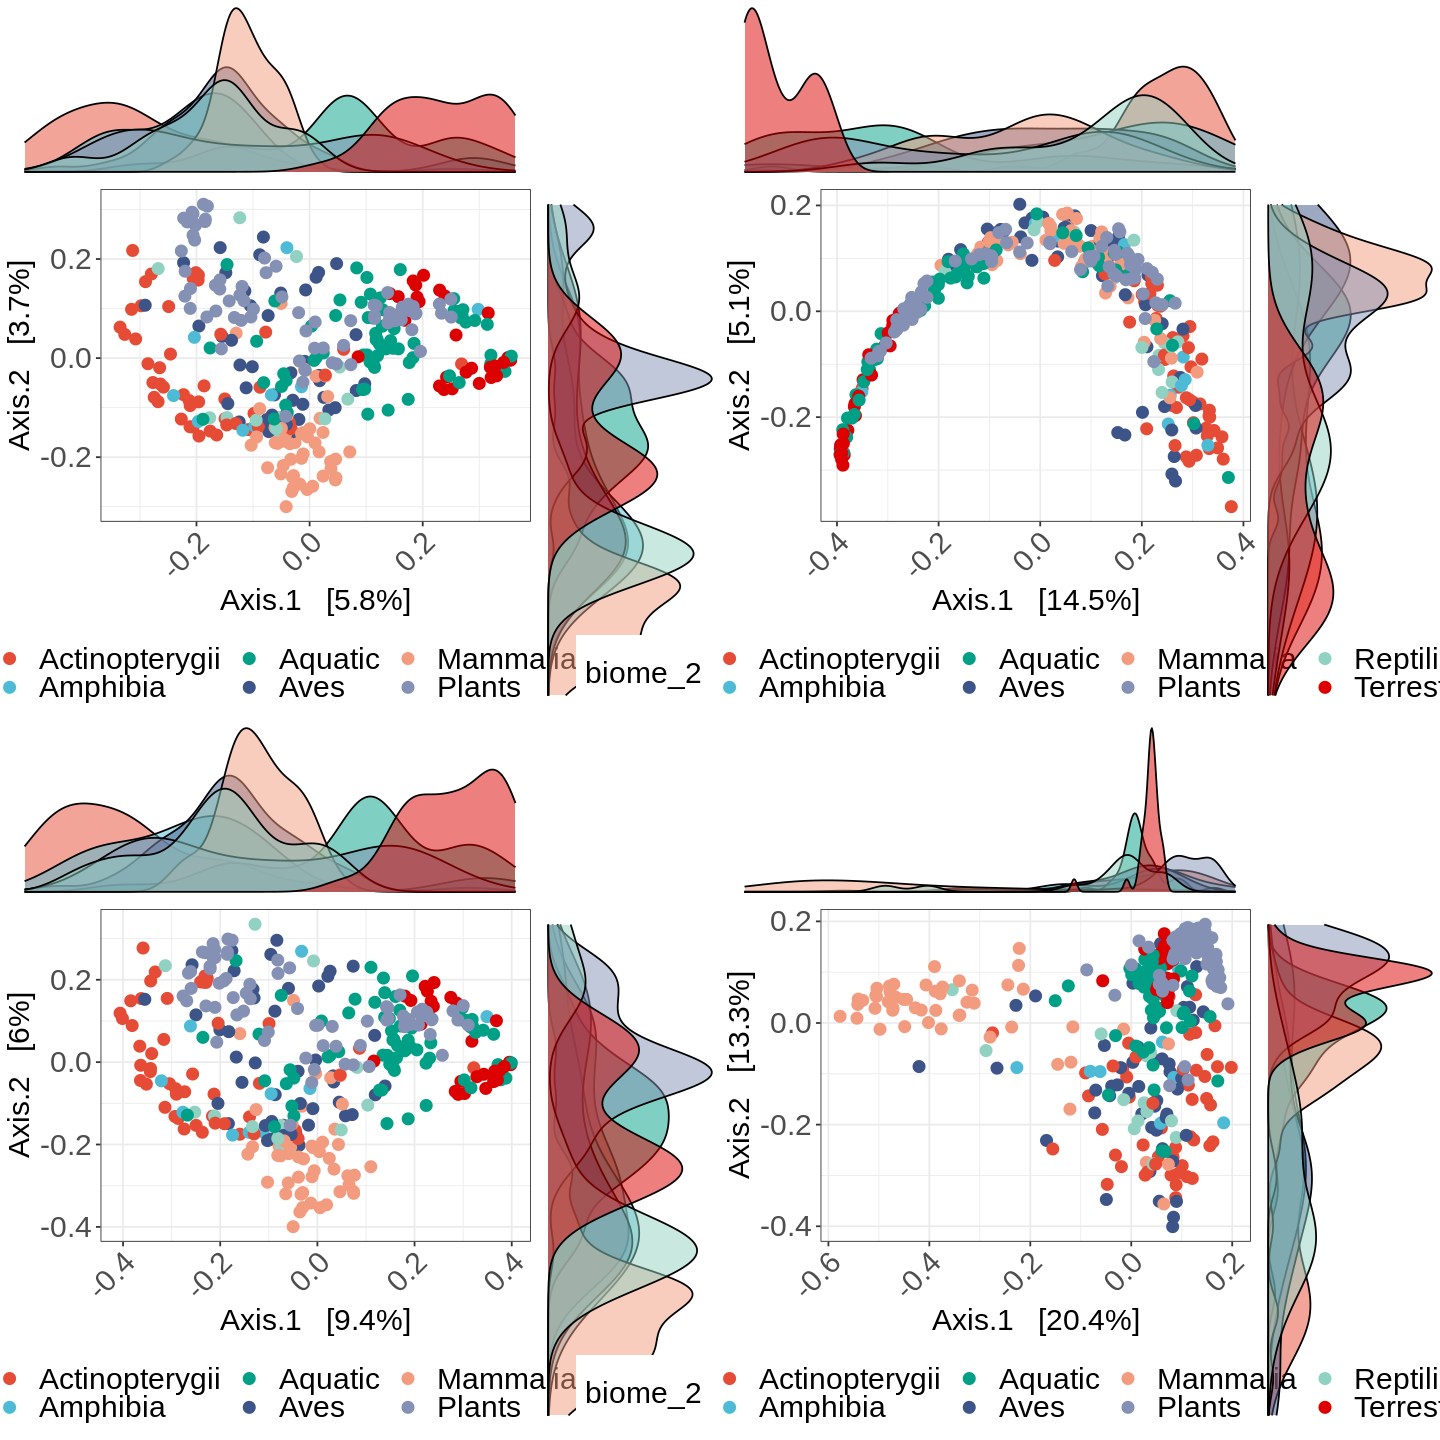

In [76]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.dist.filt,jaccard.plot.biome2,"biome_2",richness.estimates),
            plot_grid_pcoa(unifrac.dist.filt,unifrac.plot.biome2,"biome_2",richness.estimates),
            plot_grid_pcoa(bray.dist.filt,bray.plot.biome2,"biome_2",richness.estimates),
            plot_grid_pcoa(wunifrac.dist.filt,wunifrac.plot.biome2,"biome_2",richness.estimates),
            nrow=2)


#### Map mammals

In [77]:
jaccard.plot.mammals = plot_color_discrete(filter_taxa_All_count,jaccard.dist.filt,"mammals")
bray.plot.mammals = plot_color_discrete(filter_taxa_All_count,bray.dist.filt,"mammals")
unifrac.plot.mammals = plot_color_discrete(filter_taxa_All_count,unifrac.dist.filt,"mammals")
wunifrac.plot.mammals = plot_color_discrete(filter_taxa_All_count,wunifrac.dist.filt,"mammals")

Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`
Joining with `by = join_by(Sample)`


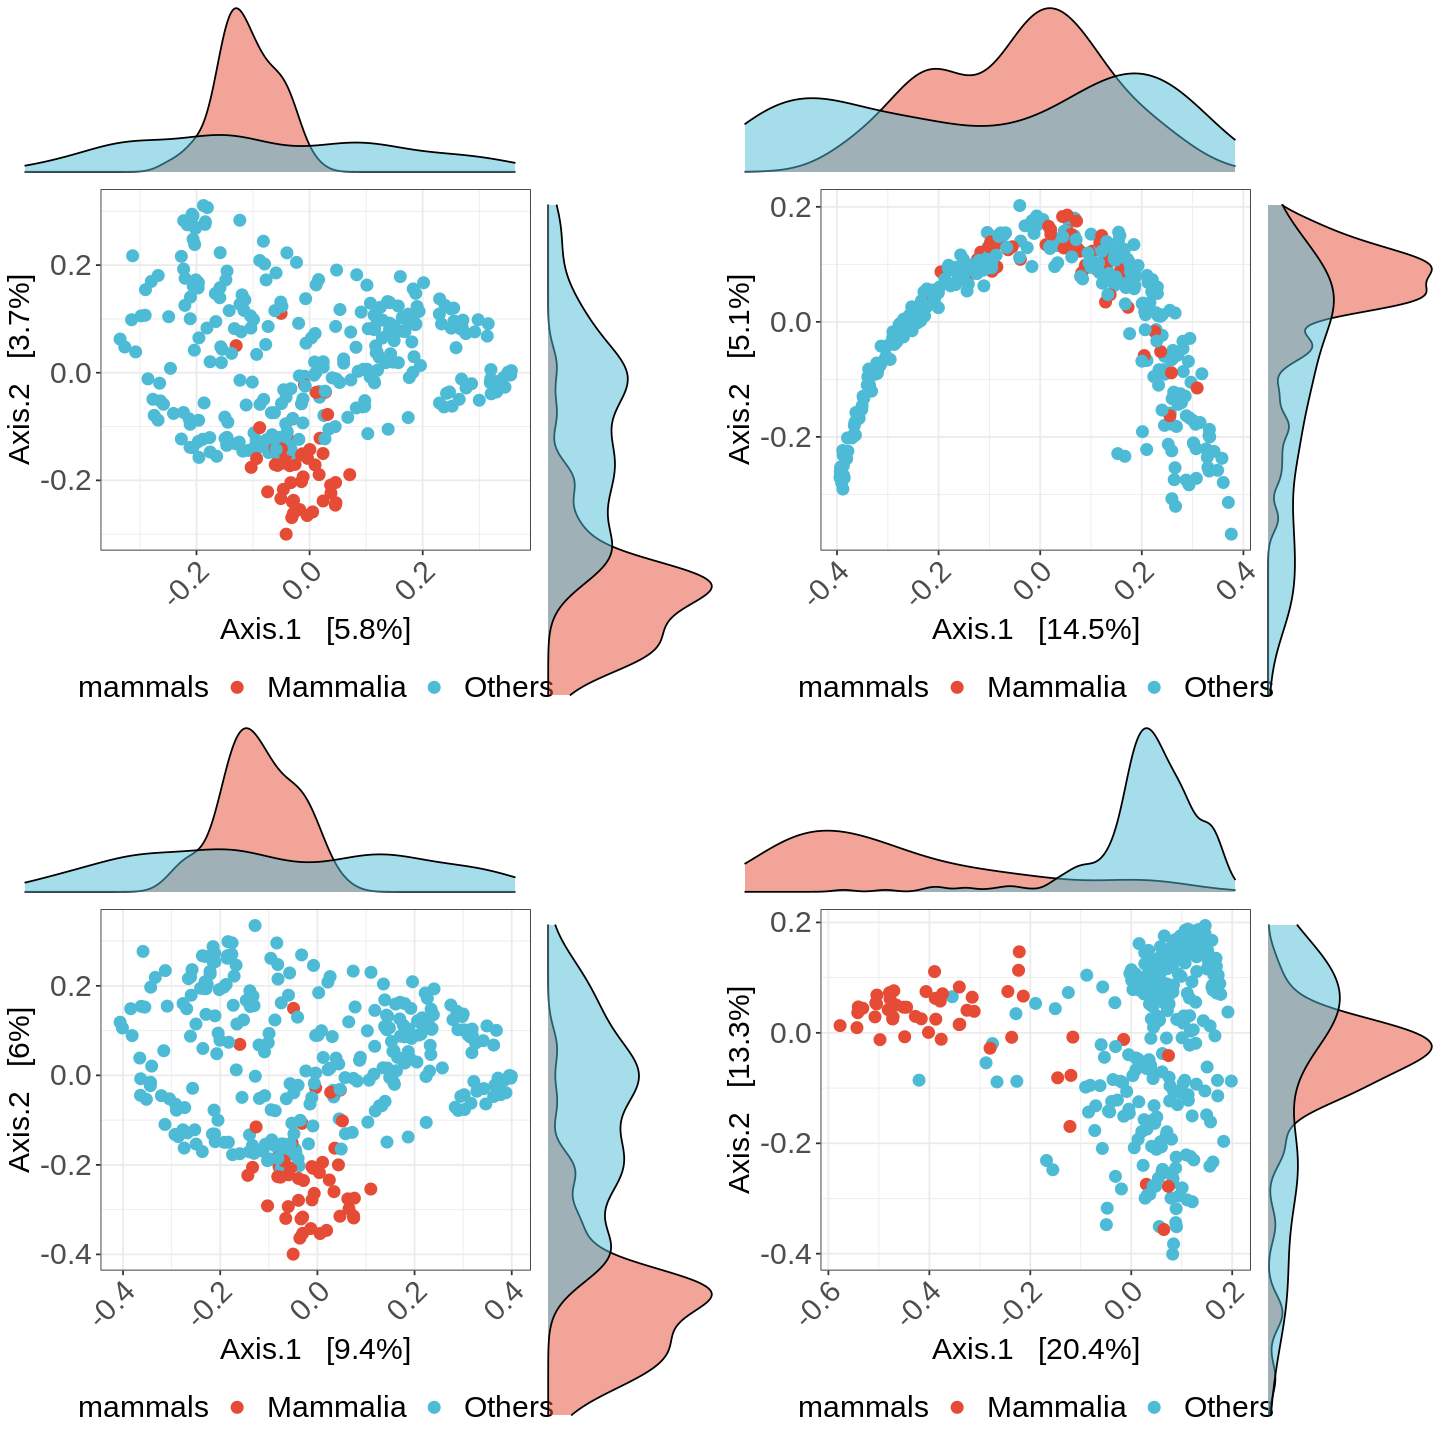

In [78]:
options(repr.plot.width=12,repr.plot.height=12)
grid.arrange(plot_grid_pcoa(jaccard.dist.filt,jaccard.plot.mammals,"mammals",richness.estimates),
            plot_grid_pcoa(unifrac.dist.filt,unifrac.plot.mammals,"mammals",richness.estimates),
            plot_grid_pcoa(bray.dist.filt,bray.plot.mammals,"mammals",richness.estimates),
            plot_grid_pcoa(wunifrac.dist.filt,wunifrac.plot.mammals,"mammals",richness.estimates),
            nrow=2)


#### Color by alpha diversity

In [79]:
#Generate plots - coloring by Shannon index
jaccard.shannon = plot_color_continuous(filter_taxa_All_count,jaccard.dist.filt,"Shannon")
bray.shannon = plot_color_continuous(filter_taxa_All_count,bray.dist.filt,"Shannon")
unifrac.shannon = plot_color_continuous(filter_taxa_All_count,unifrac.dist.filt,"Shannon")
wunifrac.shannon = plot_color_continuous(filter_taxa_All_count,wunifrac.dist.filt,"Shannon")

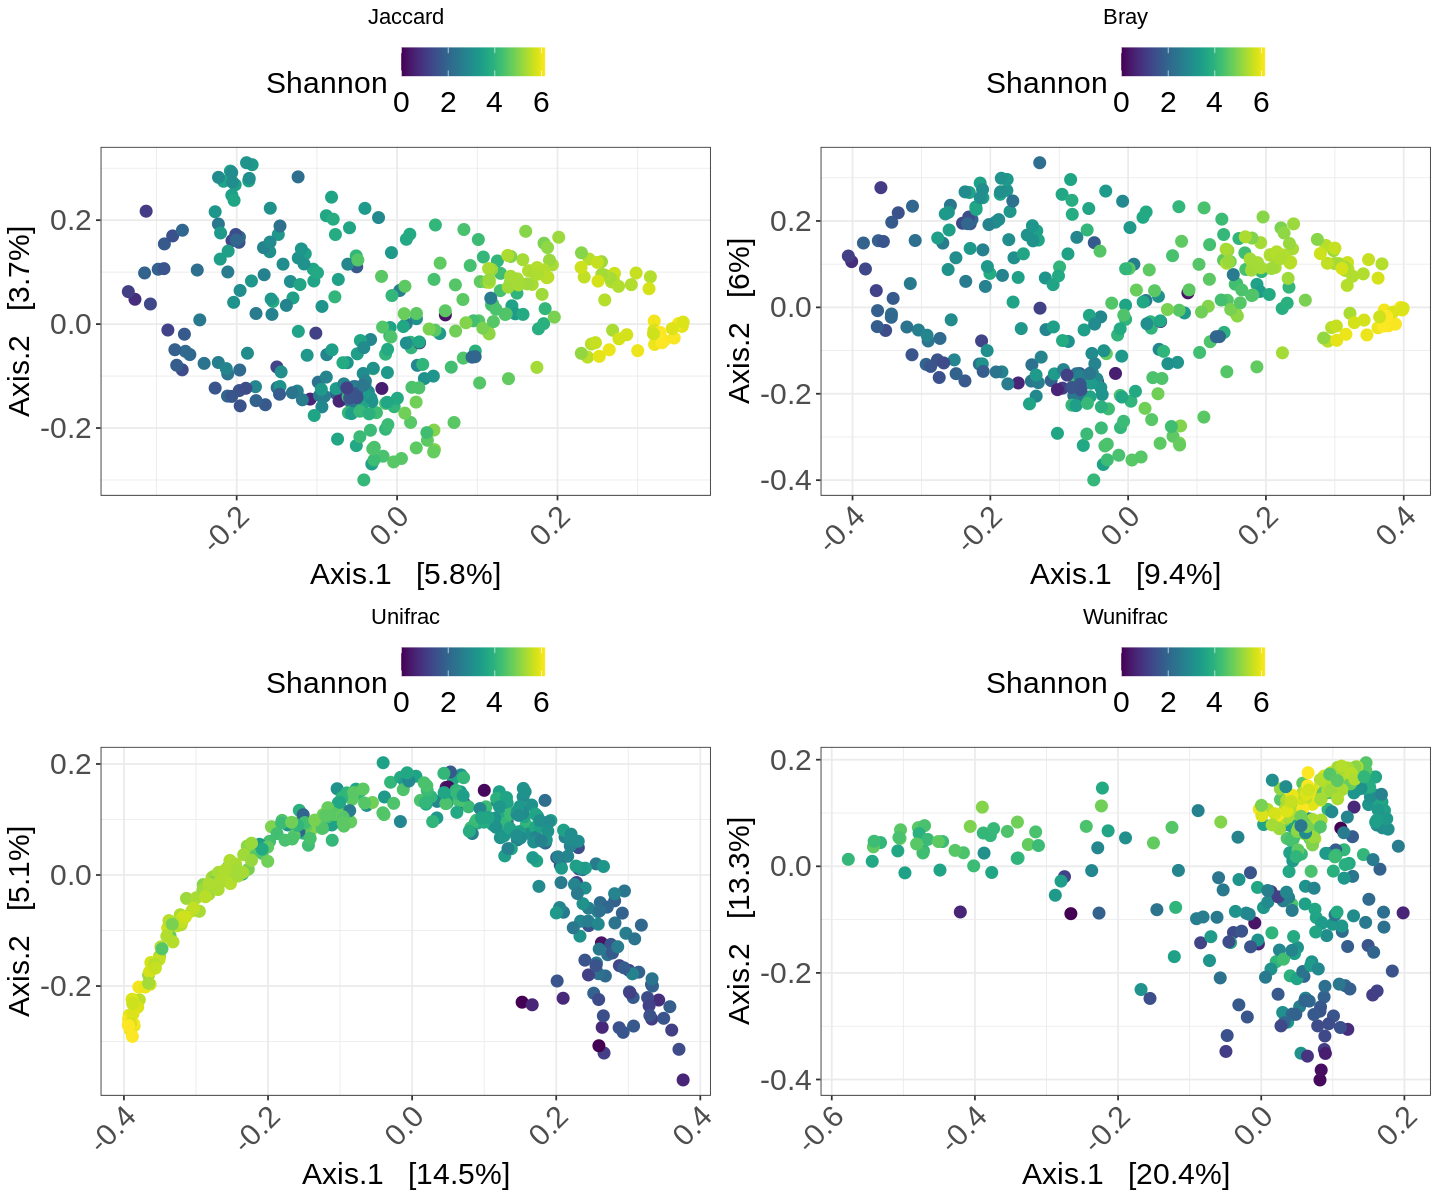

In [80]:
options(repr.plot.width=12,repr.plot.height=10)
grid.arrange(jaccard.shannon,
             bray.shannon,
             unifrac.shannon,
             wunifrac.shannon,
             nrow=2)

In [81]:
#Generate plots - coloring by Shannon index
jaccard.shannon.pca1.3 = plot_color_continuous(filter_taxa_All_count,jaccard.dist.filt,"Shannon",axes = c(2,3))
bray.shannon.pca1.3 = plot_color_continuous(filter_taxa_All_count,bray.dist.filt,"Shannon",axes = c(2,3))
unifrac.shannon.pca1.3 = plot_color_continuous(filter_taxa_All_count,unifrac.dist.filt,"Shannon",axes = c(2,3))
wunifrac.shannon.pca1.3 = plot_color_continuous(filter_taxa_All_count,wunifrac.dist.filt,"Shannon",axes = c(2,3))

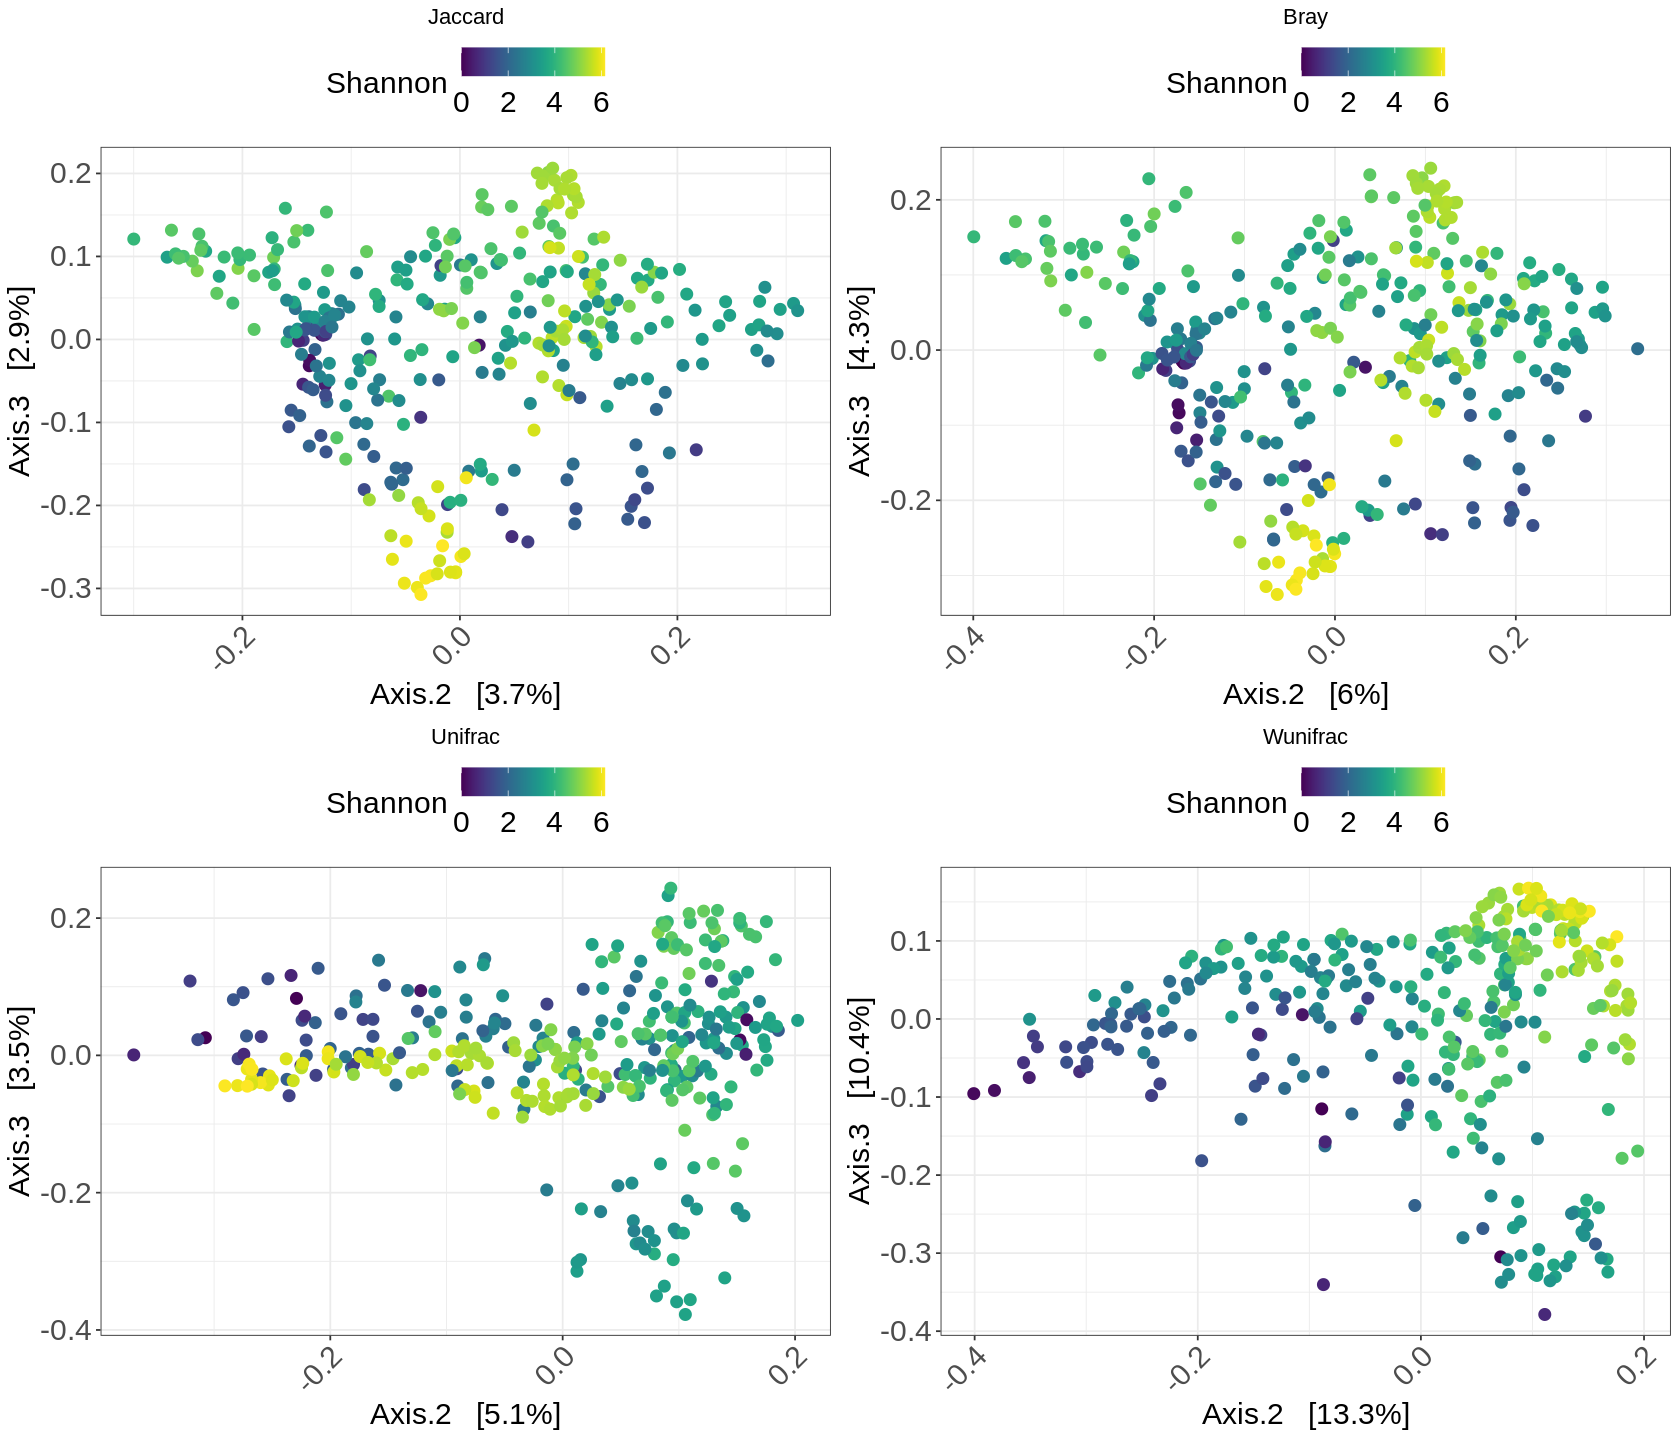

In [82]:
options(repr.plot.width=14,repr.plot.height=12)
grid.arrange(jaccard.shannon.pca1.3,
             bray.shannon.pca1.3,
             unifrac.shannon.pca1.3,
             wunifrac.shannon.pca1.3,
             nrow=2)

### Pairwise dissimilarities

#### By biome_1

In [83]:
dist.method = c("jaccard","bray","unifrac","wunifrac")

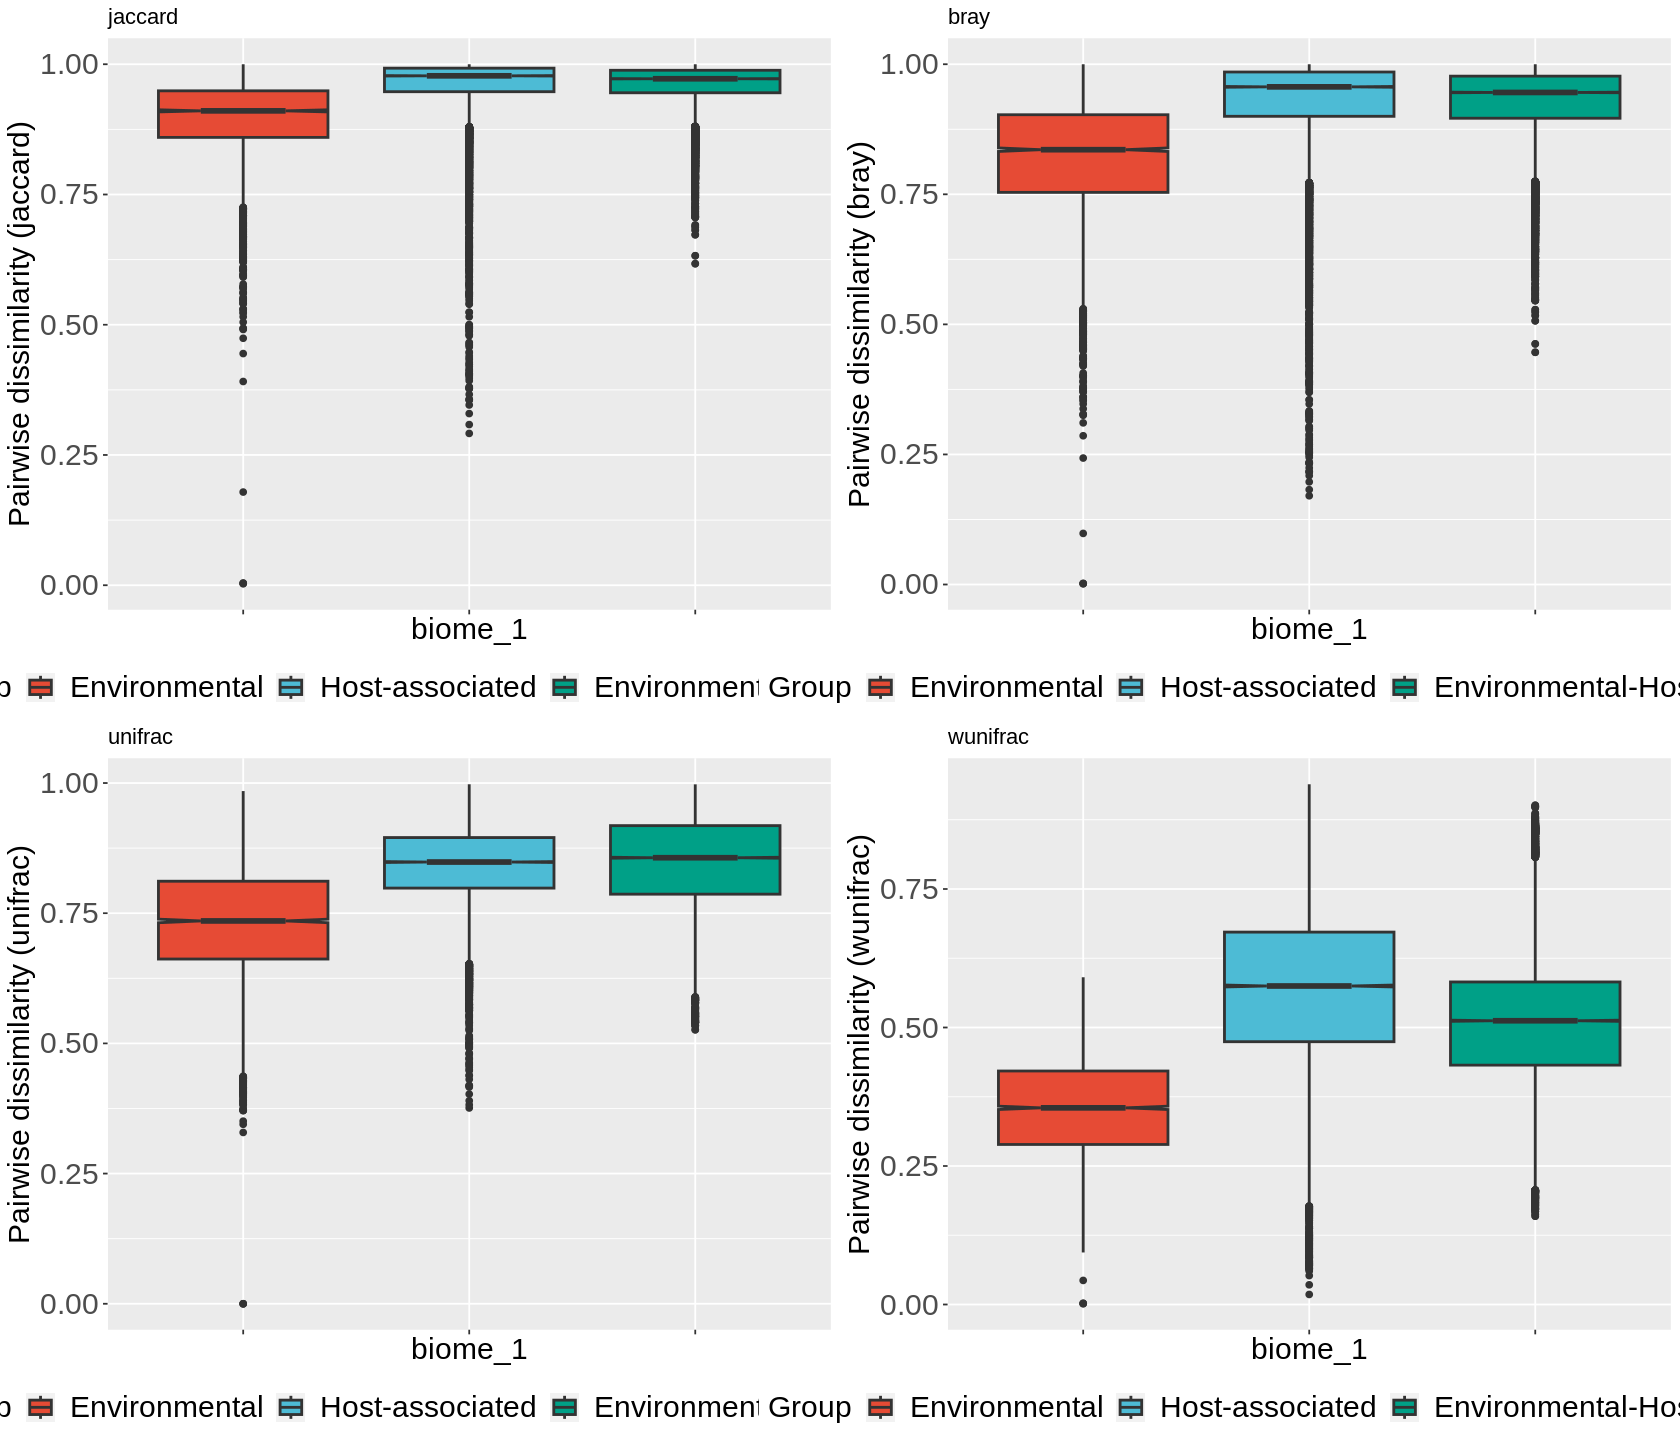

In [84]:
diss.plots.cat = compute_dissimilarity_groups_plots(filter_taxa_All_count,dist.method,"biome_1")

In [85]:
diss.plots.cat

TableGrob (2 x 2) "arrange": 4 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]

In [86]:
#Produce dissim.plot by metric
#diss.jacc1=phyloseq_group_dissimilarity(filter_taxa_All_count,group="biome_1",method="jaccard",between_groups = TRUE)+ggtitle("Jaccard")+labels.x + labels.y + labels.legend+scale_fill_npg()+theme(axis.text.x = element_text(angle=45))+theme(legend.position = "none")

#### By category

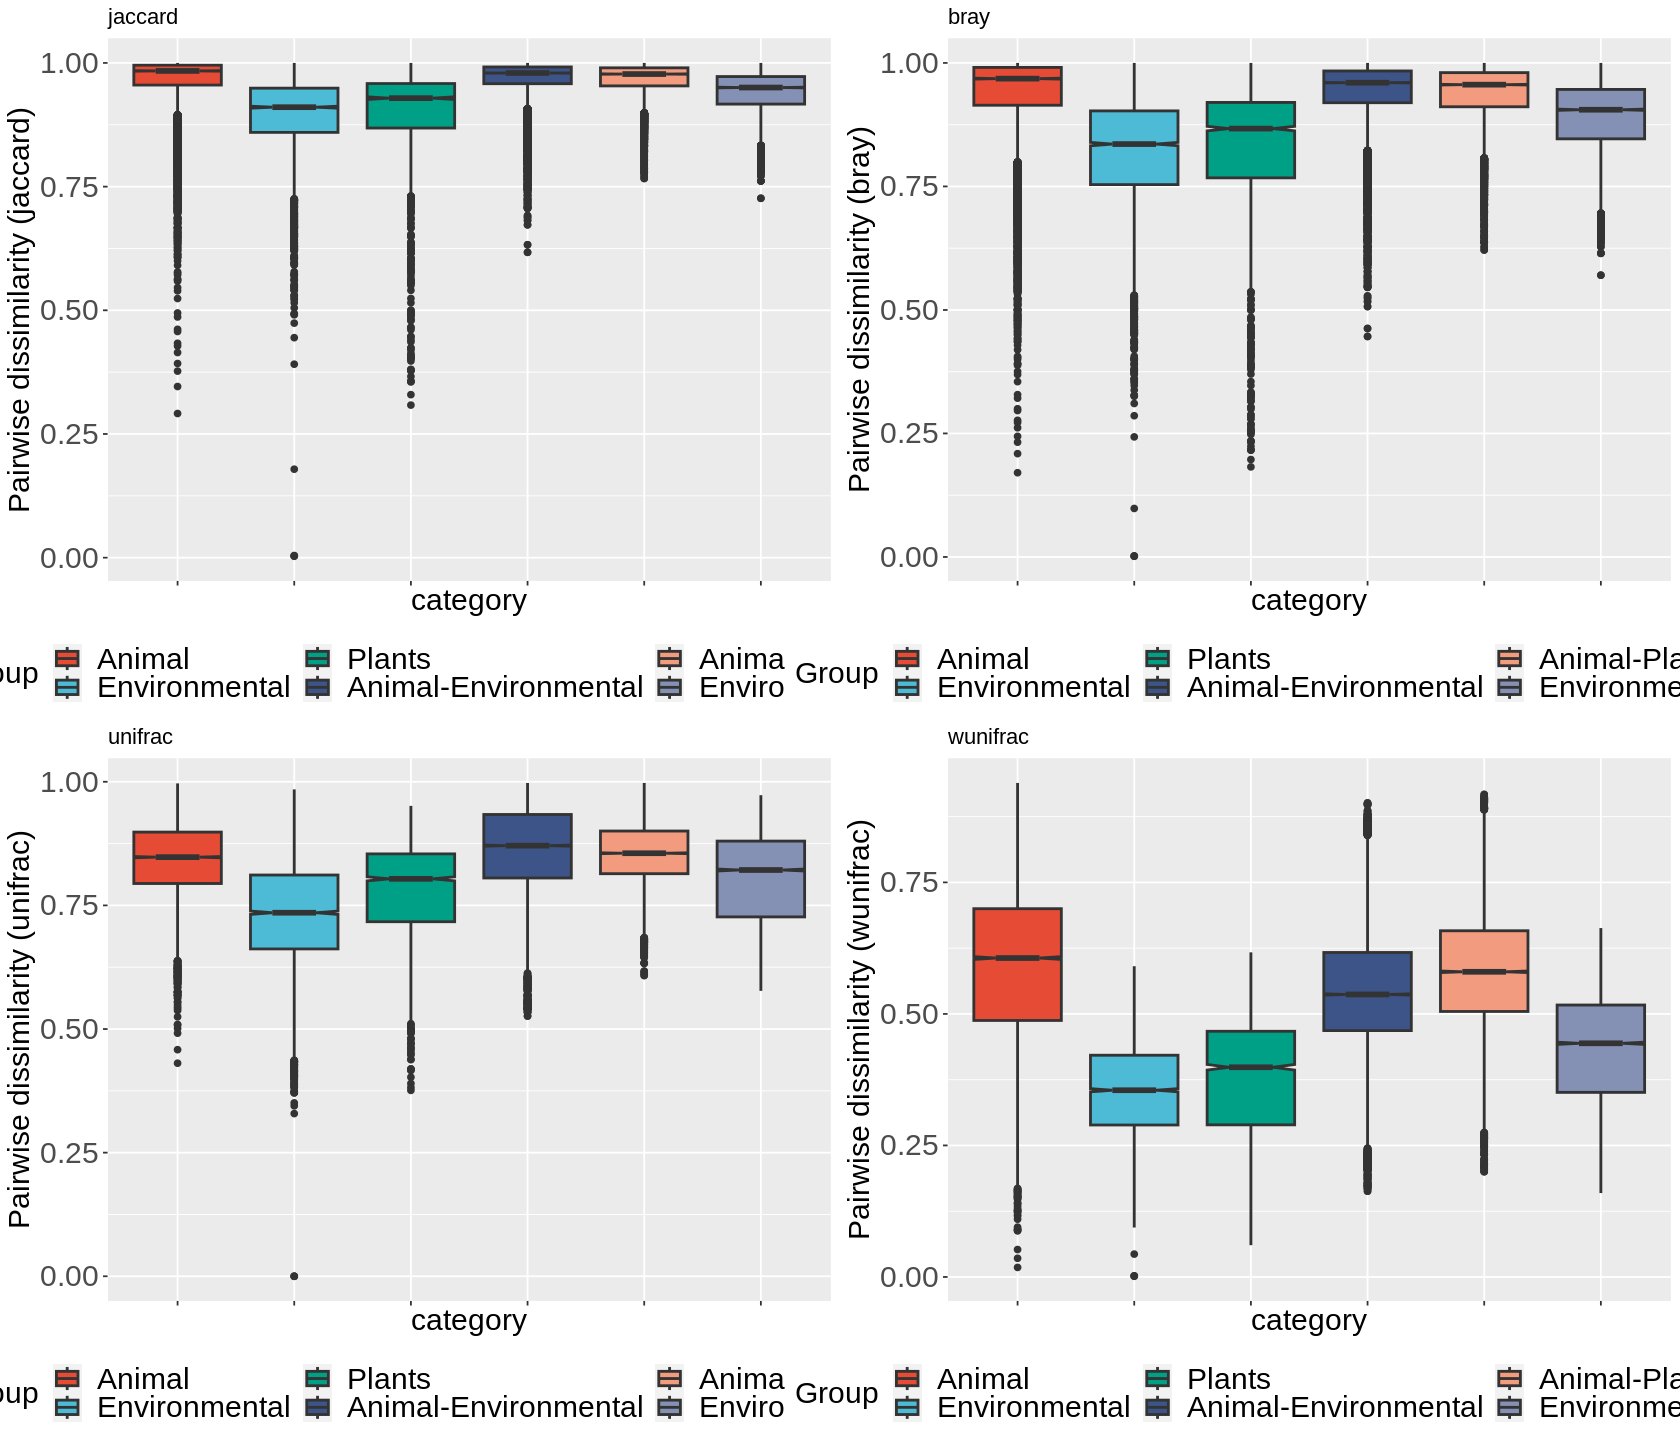

In [87]:
diss.plots.biome1 = compute_dissimilarity_groups_plots(filter_taxa_All_count,dist.method,"category")

### OTU tree

In [88]:
otu.tre=plot_tree(filter_taxa_All_count,color="category",label.tips="taxa_names")+scale_color_npg()

Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


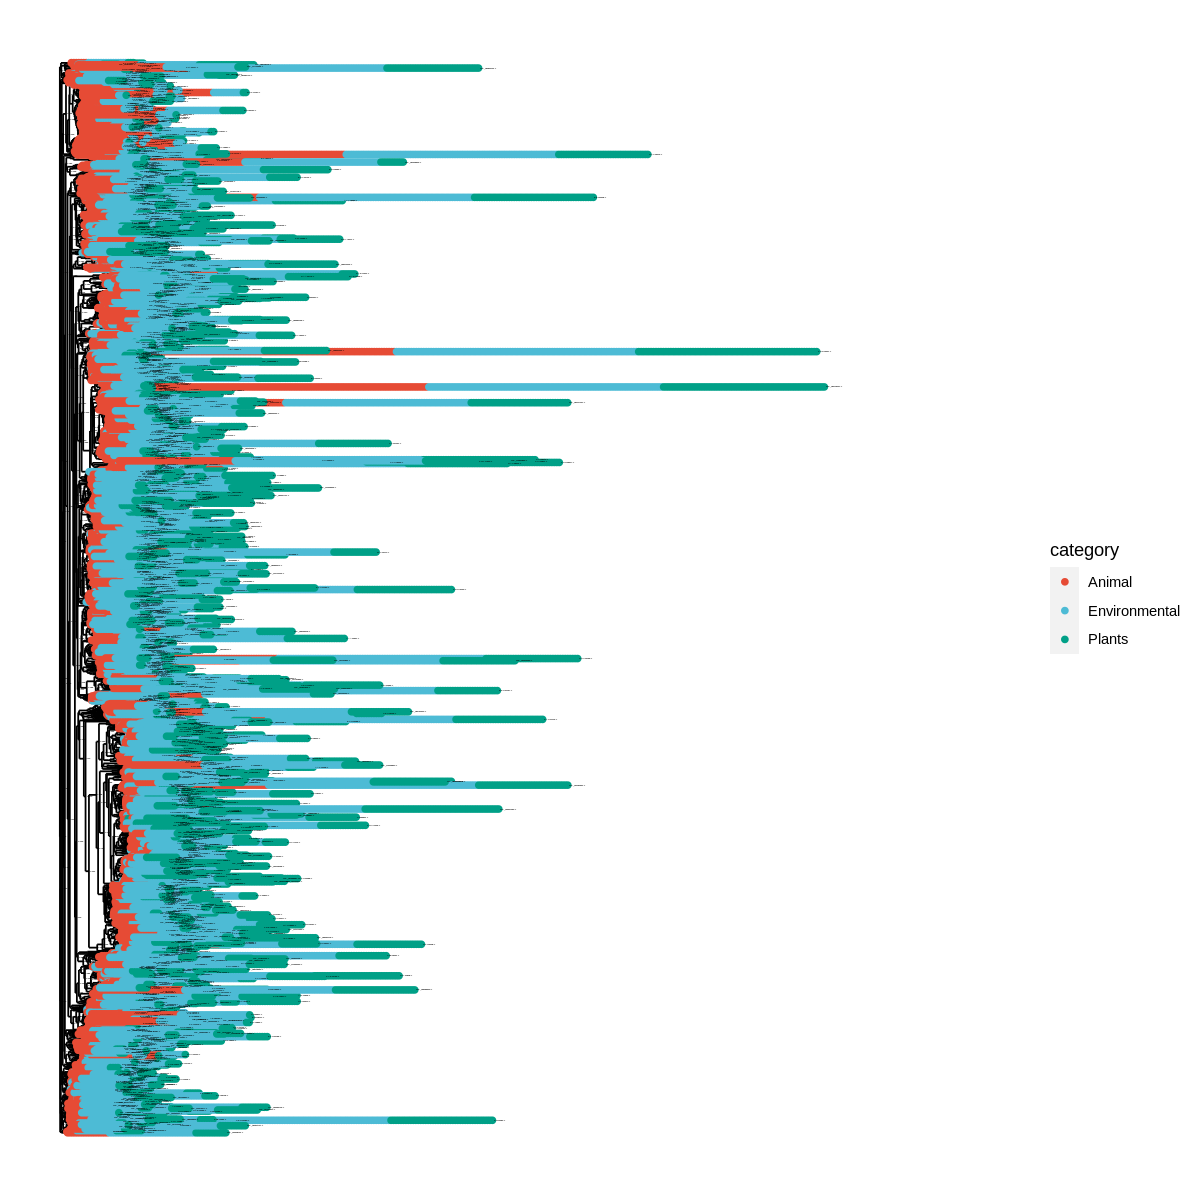

In [89]:
options(repr.plot.width=10,repr.plot.height=10)
otu.tre

In [90]:
tre.top.0.1=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=1),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 1%")

tre.top.1=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=3),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 3%")

tre.top.5=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=5),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 5%")

tre.top.10=plot_tree(phyloseq_filter_top_taxa(filter_taxa_All_count,perc=10),color="category",label.tips='Phylum')+scale_color_npg()+ggtitle("Top 10%")


Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”
Warning message in psmelt(physeq):
“The sample variables: 
Sample
 have been renamed to: 
sample_Sample
to avoid conflicts with special phyloseq plot attribute names.”


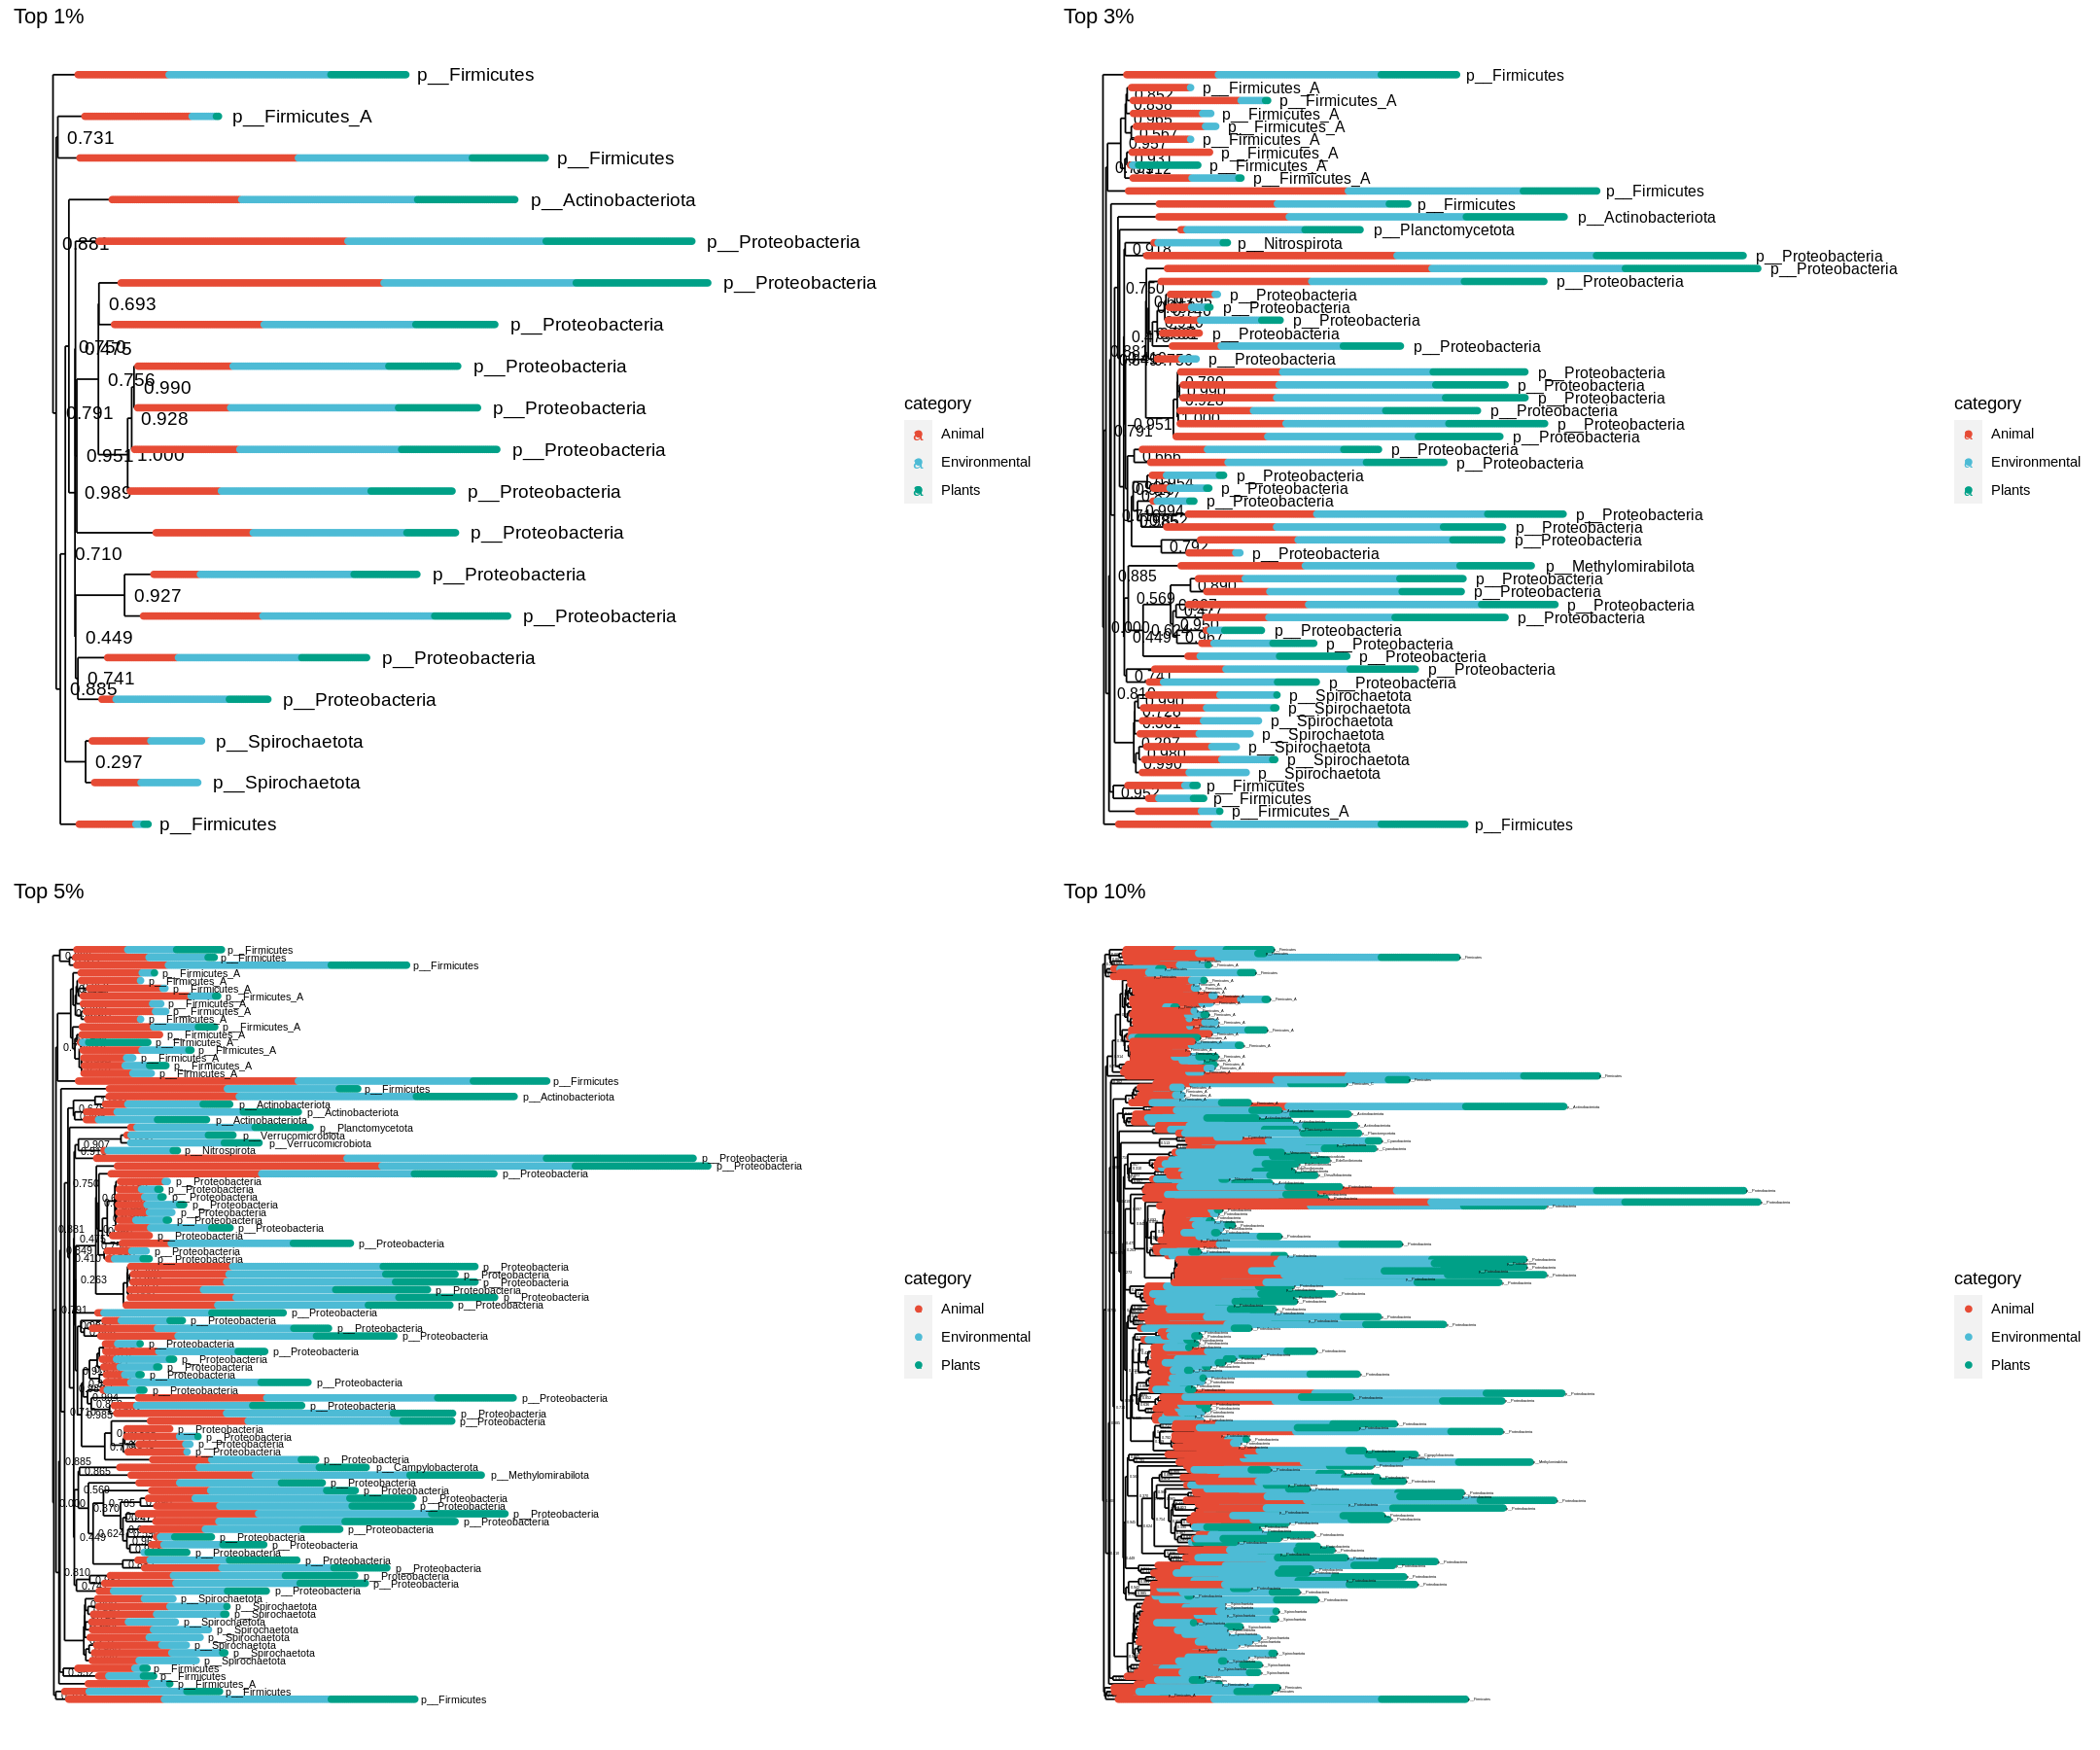

In [91]:
options(repr.plot.width=18,repr.plot.height=15)
grid.arrange(tre.top.0.1,
             tre.top.1,
             tre.top.5,
             tre.top.10,
             nrow=2)

### Plot OTUs network

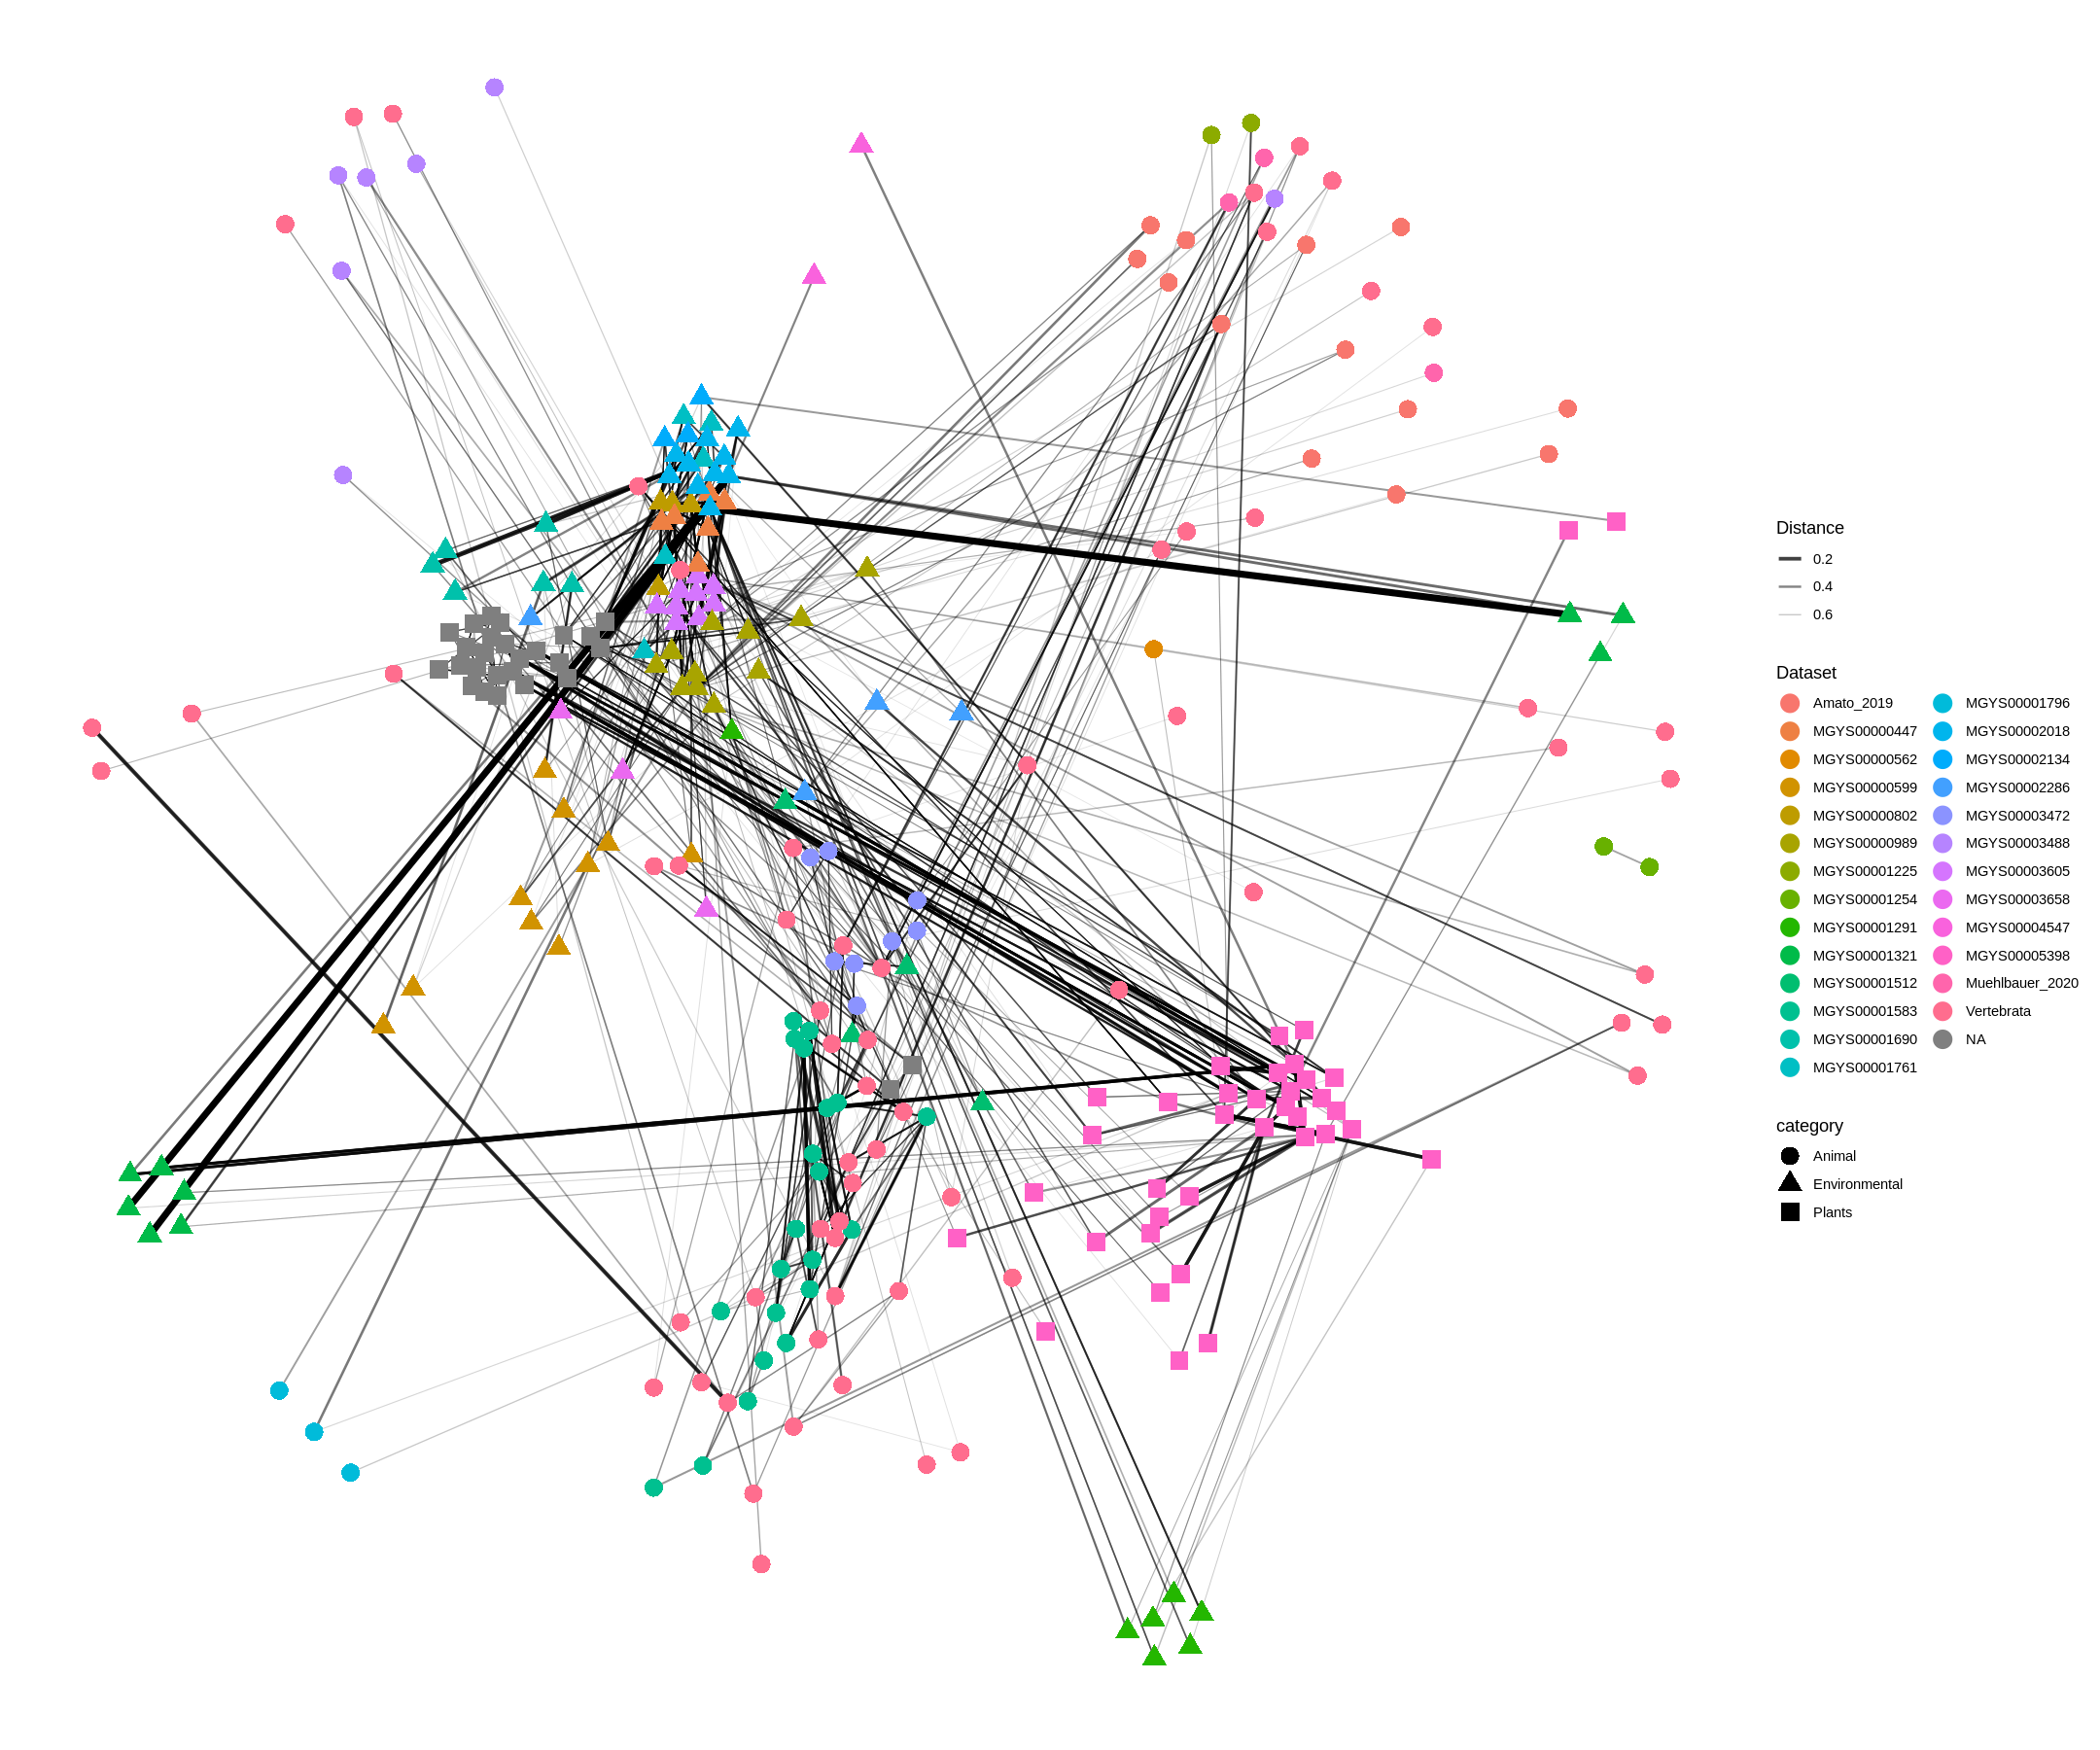

In [92]:
plot_net(filter_taxa_All_count, maxdist=0.7, color="Dataset", shape="category")

# 4. Get flagellins unique in each biome

In [93]:
ps.env = ps_filter(filter_taxa_All,biome_1 == "Environmental")

In [94]:
jaccard.env = ordinate(ps.env,distance="jaccard",method="PCoA")

In [95]:
jacc.env.plot = plot_color_discrete(ps.env,jaccard.env,"biome_2")


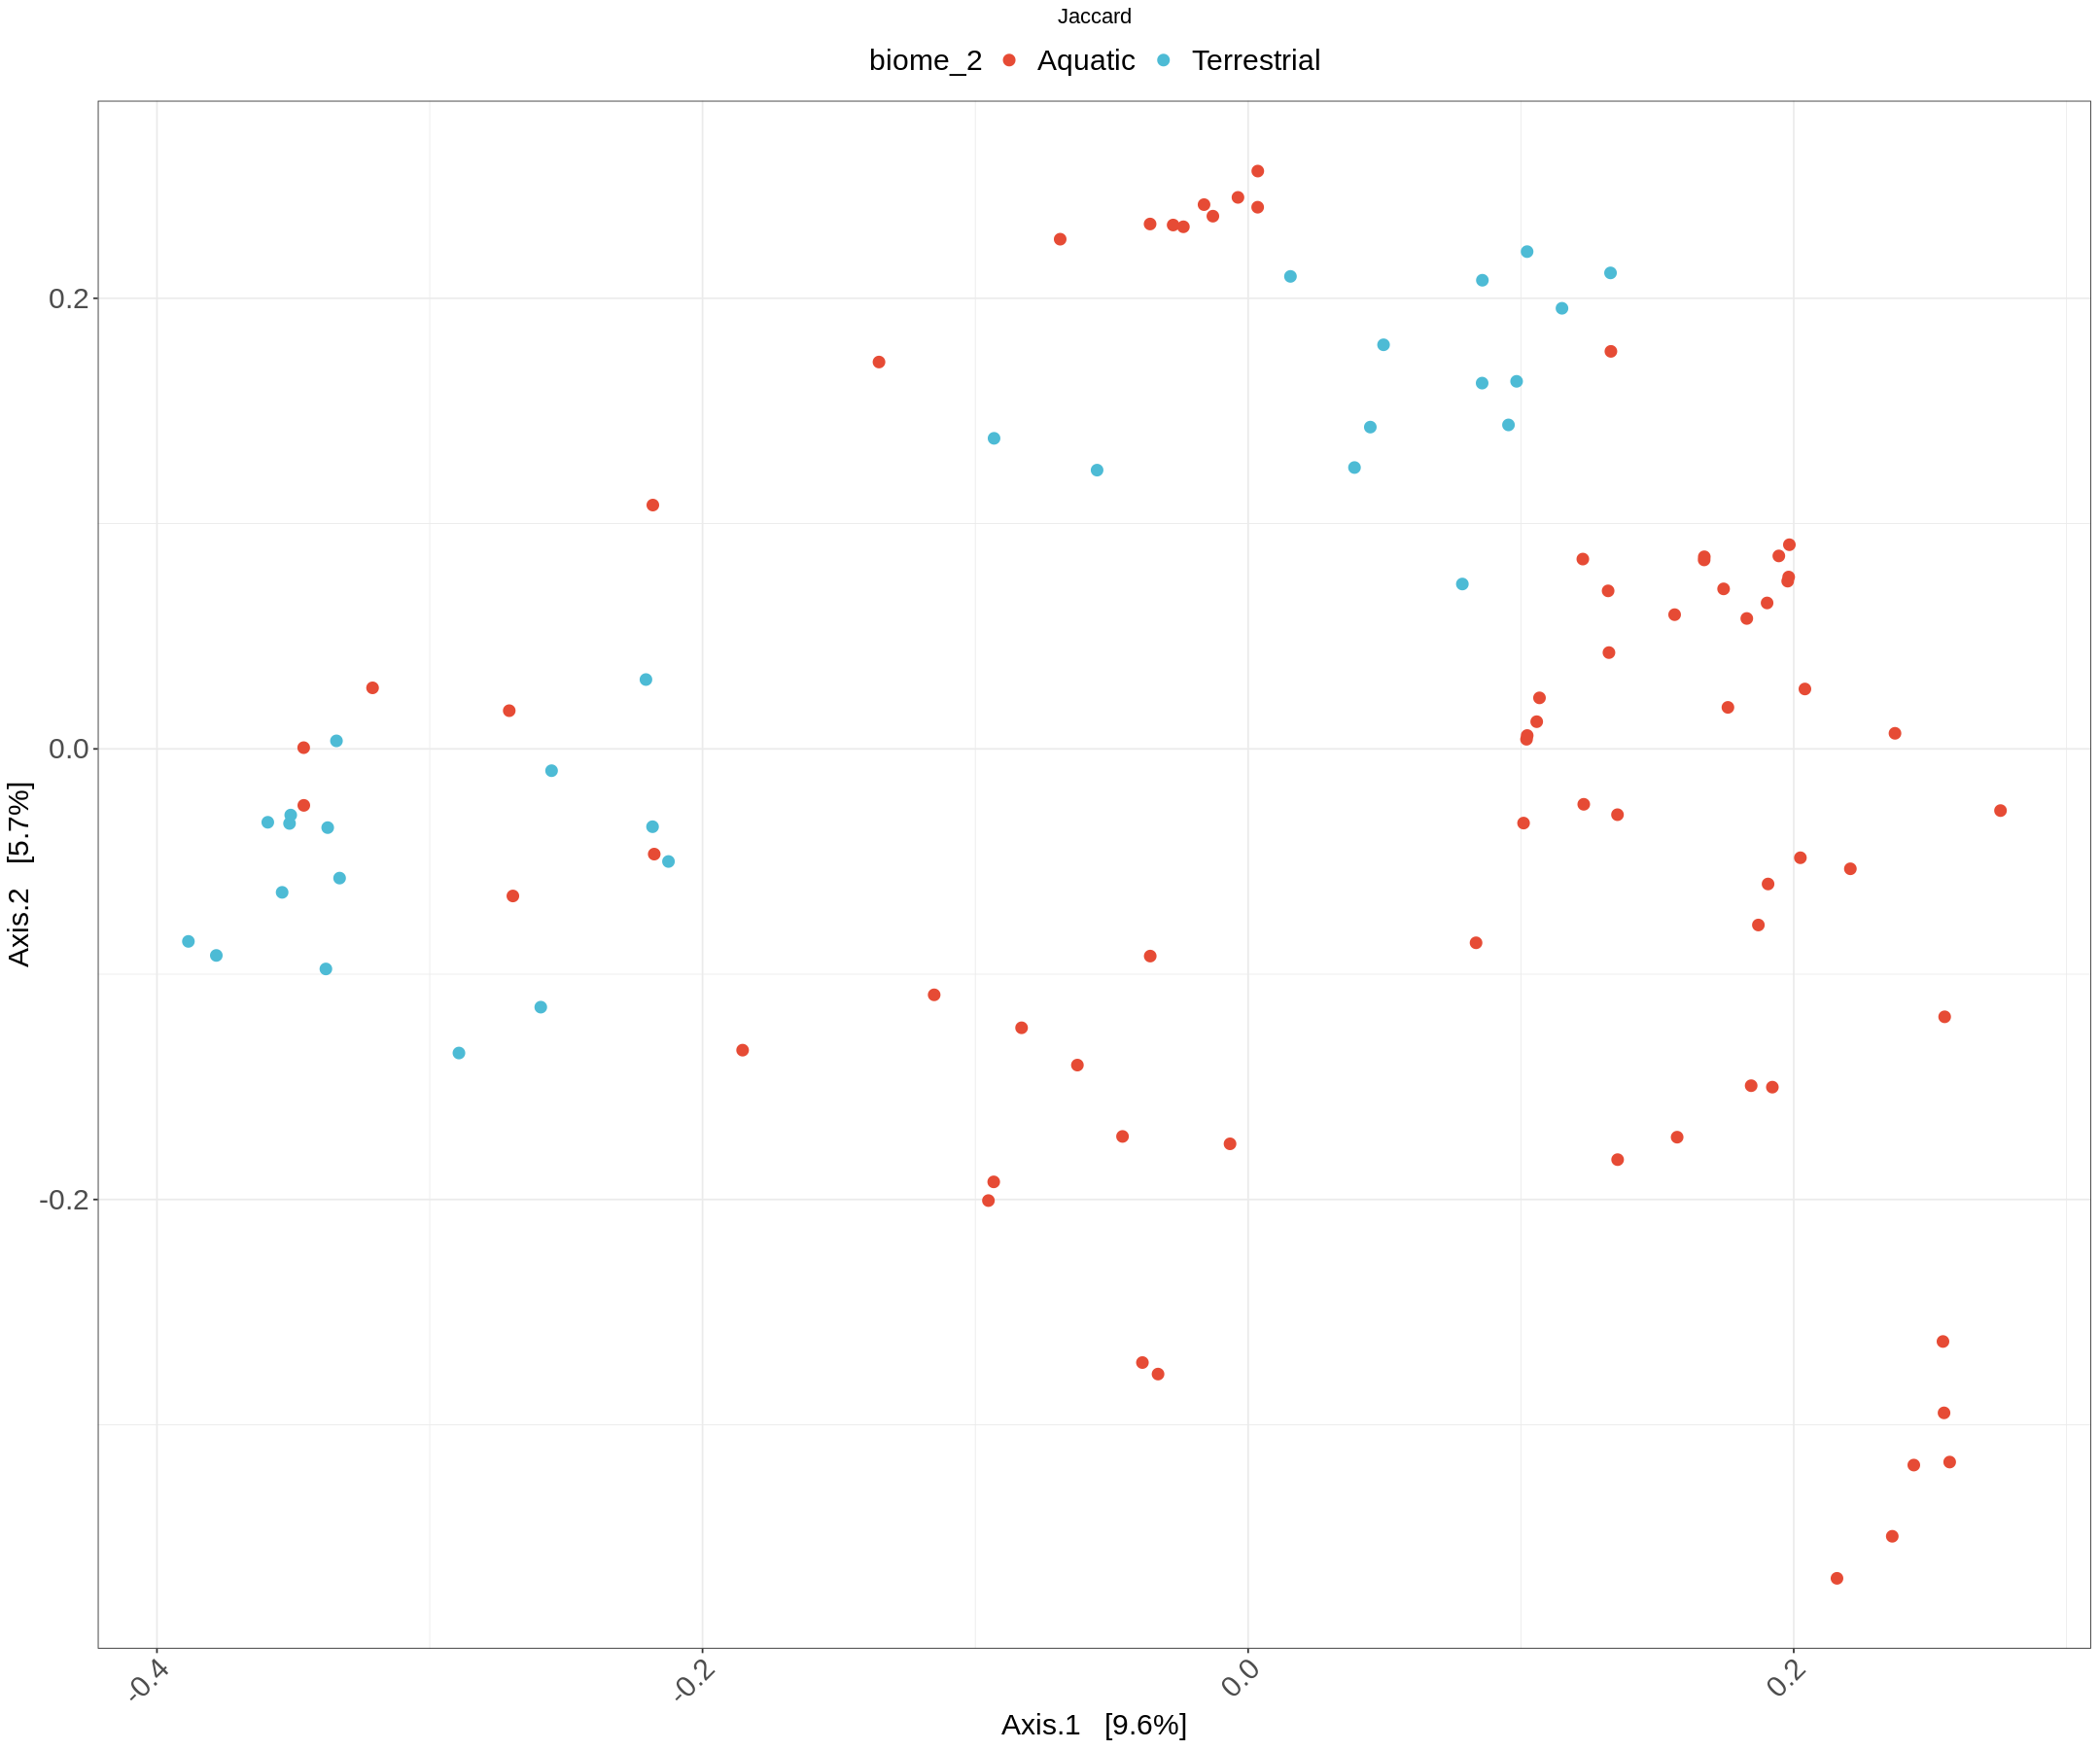

In [96]:
jacc.env.plot

In [97]:
library(gtable)

In [98]:
  ordination.plot <- plot_ordination(
    physeq = ps.env,
    ordination = ordination.matrix,
    type = "samples",
    color = color_by,
    axes = axes
  ) +
    theme_bw() +
    geom_point(size = 3) +
    theme(legend.position = "top") +
    scale_color_npg() +
    ggtitle(title) +
    theme(plot.title = element_text(hjust = 0.5)) +
    labels.x + labels.y + labels.legend


ERROR: Error in plot_ordination(physeq = ps.env, ordination = ordination.matrix, : object 'color_by' not found


In [ ]:
sessionInfo()